# tag und member
* speichert in data_01
* 17 min
* lex_test level 1
-----


* erstellt die Felder tag und member 
* integriert lexeme_manuell und named_entities
* Löschen laut löschliste
* behandelt Partizipien

* erstellt dort wiktionary_lemma und wiktionary_nolemma
* wiktionary ist danach überflüssig


### Doku
* __Abkürzungen__ stehen immer in wiktionary_merkmal (merkmal abk) und manchmal auch als eigenständiges Lemma in wiktionary_lemma.
  In wiktionary_lemma werden Abkürzungen durch das member 'Abkürzung' gekennzeichnet. 
  Das gibt die Information, dass es sich lohnt, in wiktionary_merkmal nachzuschlagen, um die Bedeutung einer Abkürzung zu erfahren.

* __Partizipien__ stehen in wiktionary_merkmal. Ihr lemma ist das Verb im Infinitiv (das ist oft falsch eingetragen). Ihr tag lautet 'VVPP ADJA' für Ptz2 bzw. 'VVFIN ADJA' für Ptz1, ihr member ist Ptz1 bzw. Ptz2.
  Zusätzlich sind alle Partizipien aber auch als Adjektiv als eigenständiges lemma registriert. Dort weist data_id auf das Verb zurück.
  
### TODO 
* named_entities: section_id2 von existierenden Einträgen übertragen

  
### TODO Ganz am Ende, wenn alles komplett fertig ist:
* TODO_verwaiste_Wörter: Wichtige Wörter nachverfolgen. 
* TODO_TAGS_IN_MERKMALE: Sind diese Lexeme im Endergebnis enthalten? Gehören die nicht in wiktionary_nolemma??
* TODO_MEMBER_ÜBERPRÜFEN: Sind diese Informationen im Endergebnis enthalten?
* TODO_Widersprüchliche_Angaben

In [1]:
!pip uninstall -Y jupyterlab-github


Usage:   
  pip uninstall [options] <package> ...
  pip uninstall [options] -r <requirements file> ...

no such option: -Y


In [1]:
# blab init
try:
    import blab
except ImportError as e:
    !pip install blab
    import blab    
startup_notebook = blab.blab_startup()
%run $startup_notebook 

blab init
environment['dropbox_path'] = /home/me/Data_Linux/Dropbox
environment['lib_path']     = /home/me/Data_Linux/Dropbox/31_Projekte/01_Python/libs
Start Time: 17:51:44


time: 409 ms


In [3]:
import numpy      as np
import pandas     as pd 
import bpyth      as bpy

import pandasklar as pak 
grid       = pak.grid
check_mask = pak.check_mask

import bj_nlp

time: 3.54 s


In [4]:
from x32_Funktionen                    import *
from Steuertabellen.s01_Steuertabellen import *
from collections                       import defaultdict

time: 44.4 ms


In [5]:
# Einstellungen

# Was debuggen?
suche_debug = ['gefriergetrocknet','gefriertrocknen','missraten']  

gründlich          = True    # einige Arbeitsschritte können weggelassen werden, wenn gründlich = False
speicher_freigeben = False    # sollen alte Ergebnisse gelöscht werden
version            = '_all'
#version           = '_100K'




# verbose
pak.Config.set('VERBOSE', True)

# Load
verzeichnis_load                      = 'data_00'
wiktionary_filename                   = verzeichnis_load + '/wiktionary'              + version + '.pickle'  
wiktionary_trash_filename             = verzeichnis_load + '/wiktionary_trash'        + version + '.pickle'
wiktionary_merkmal_filename           = verzeichnis_load + '/wiktionary_merkmal'      + version + '.pickle'  
wiktionary_merkmal_text_filename      = verzeichnis_load + '/wiktionary_merkmal_text' + version + '.pickle'  

# Steuertabellen, externe und manuelle Daten
löschliste_filename                   = 'Steuertabellen/löschliste.xlsx'     
lexeme_manuell_filename               = 'Steuertabellen/lexeme_manuell.xlsx'                              # manuell eingepflegte Lexeme 
named_entities_filename               = '../../22 NLP NamedEntities/data_02/named_entities_02.xlsx'  
lex_test_filename                     = 'Steuertabellen/lex_test.xlsx'     

# Save
verzeichnis_save                      = 'data_01'
wiktionary_lemma_filename_save        = verzeichnis_save + '/wiktionary_lemma'        + version + '.pickle'  
wiktionary_nolemma_filename_save      = verzeichnis_save + '/wiktionary_nolemma'      + version + '.pickle'  
wiktionary_merkmal_filename_save      = verzeichnis_save + '/wiktionary_merkmal'      + version + '.pickle'  
wiktionary_merkmal_text_filename_save = verzeichnis_save + '/wiktionary_merkmal_text' + version + '.pickle'  

#
# Einige hardcodierte Tags finden sich unter wiktionary Einzelkorrekturen
# !!!

VERBOSE = True
--> setting verbose=True as default for all pandasklar functions

time: 40.9 ms


## Daten laden

In [6]:
# wiktionary laden     
wiktionary               = pak.load_pickle(wiktionary_filename)
wiktionary               = pak.drop_cols(wiktionary,['wikitext','section_id'])

wiktionary_trash         = pak.load_pickle(wiktionary_trash_filename)
wiktionary_trash         = pak.drop_cols(wiktionary_trash,['msg','section_id','wikitext'])
wiktionary_trash         = pak.rename_col(wiktionary_trash,'error','msg')

wiktionary_merkmal       = pak.load_pickle(wiktionary_merkmal_filename)
wiktionary_merkmal       = pak.drop_cols(wiktionary_merkmal,['section_id'])

wiktionary_merkmal_trash = wiktionary_merkmal.head(0)

wiktionary_merkmal_text  = pak.load_pickle(wiktionary_merkmal_text_filename)

806916 rows loaded
3966 rows loaded
4976091 rows loaded
619794 rows loaded
time: 16.9 s


In [7]:
# laden

# pak.nnan(wiktionary_merkmal_text)

time: 32 ms


In [8]:
# Keine NaN
assert not pak.any_nan(wiktionary, without=['syllables','rhymes','flexion','ipa'])

time: 781 ms


In [9]:
# Keine Leerzeichen in der ID
mask = wiktionary.section_id2.str.contains(' ')
check_mask(wiktionary,mask,0)

check_mask:  0 rows
time: 274 ms


In [10]:
pak.memory_consumption(locals())

name                rtype      size
0       wiktionary_merkmal  (DataFrame, Series)    2.1 GB
1               wiktionary  (DataFrame, Series)  741.3 MB
2  wiktionary_merkmal_text  (DataFrame, Series)  307.0 MB
3         wiktionary_trash  (DataFrame, Series)    3.8 MB
4                     mask            (Series,)    1.5 MB
5            translate_tag  (DataFrame, Series)   37.1 KB
6           translate_tagZ  (DataFrame, Series)   20.9 KB
7                      _i5               (str,)    3.8 KB
8                     Stop              (type,)    1.0 KB
9                 Markdown              (type,)    1.0 KB

time: 3.9 s


### wiktionary anschauen

In [11]:
# suche_debug 
mask = wiktionary.title.isin(suche_debug)
grid(wiktionary[mask].sort_values(['section_id2',]))

3 rows


time: 259 ms


In [12]:
# suche_debug 
mask = wiktionary_trash.title.isin(suche_debug)
grid(wiktionary_trash[mask].sort_values(['section_id2',]))

No rows
time: 106 ms


In [13]:
# wiktionary_trash
a = pak.analyse_freqs(wiktionary_trash, 'msg')
a

msg  msg_count  msg_percent  \
0  title zu viele Wörter       3729         94.0   
1          title zu kurz        205          5.2   
2          lemma zu kurz         26          0.7   
3      lang_code ist nan          6          0.2   

                                             graph  
0  ###############################################  
1                                               ##  
2                                                   
3

time: 85.6 ms


### wiktionary_merkmal anschauen

In [215]:
# suche_debug 
mask = wiktionary_merkmal.data.isin(suche_debug)
grid(wiktionary_merkmal[mask].sort_values(['section_id2','merkmal']))

59 rows


time: 570 ms


In [15]:
pak.analyse_cols(wiktionary_merkmal)

col_name datatype_instance   datatype datatype_short datatype_suggest  \
0     __index__             int64   np.int64          int64         np.int32   
1   section_id2               str  pd.string         string                    
2       merkmal               str  pd.string         string                    
3    node_debug               str  pd.string         string                    
4  node_kontext               str  pd.string         string                    
5          data               str  pd.string         string                    
6           num              list     object         object                    
7          meta               str  pd.string         string                    

   is_numeric  is_string  is_hashable  nan_allowed mem_usage  ntypes  nunique  \
0        True      False         True        False    80.0 B       1  4976091   
1       False       True         True         True   780.0 B       1   806049   
2       False       True         True         True   720.0 B       1       37   
3       False       True         True         True   727.0 B       1       30   
4       False       True         True         True   603.0 B       1      229   
5       False       True         True         True   783.0 B       1   706156   
6       False       True        False         True   496.0 B       1      222   
7       False       True         True         True   519.0 B       1    17712   

      nnan    ndups        n    vmin      vmean    vmedian           vmax  \
0        0        0  4976091     0.0  2488045.0  2488045.0      4976090.0   
1        0  4170042  4976091     &c.        NaN        NaN             μm   
2        0  4976054  4976091  Präfix        NaN        NaN      übersicht   
3    10901  4965160  4976091                NaN        NaN  Wortart fehlt   
4    10901  4964961  4976091                NaN        NaN              Ü   
5        0  4269935  4976091                NaN        NaN            𒄿𒌑𒃷   
6  1085326  3890543  4976091      []        NaN        NaN         [1225]   
7  1085326  3873053  4976091                NaN        NaN          παθοs   

           vsum  
0  1.238074e+13  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN

time: 19.9 s


In [16]:
pak.analyse_freqs(wiktionary_merkmal,['merkmal','data'])

merkmal  merkmal_count  merkmal_percent  \
0              gm        2476867             49.8   
1       übersicht        1074230             21.6   
2             def         271480              5.5   
3         familie         177932              3.6   
4            down         167582              3.4   
5           kombi         144226              2.9   
6           alt_1         141725              2.8   
7             syn         139047              2.8   
8              up         108079              2.2   
9         lateral         106094              2.1   
10          gegen          67961              1.4   
11          alt_2          28399              0.6   
12       herkunft          23943              0.5   
13            alt           9200              0.2   
14        noSteig           7605              0.2   
15           weib           6433              0.1   
16          alt_3           5831              0.1   
17           männ           5145              0.1   
18            abk           4974              0.1   
19        istName           1783              0.0   
20          klein           1190              0.0   
21      familie_1            983              0.0   
22        alt_abk            777              0.0   
23      alt_klein            666              0.0   
24         noSing            631              0.0   
25    down_part_1            625              0.0   
26        up_part            423              0.0   
27      down_part            419              0.0   
28       alt_männ            388              0.0   
29       alt_weib            376              0.0   
30     Wikivoyage            232              0.0   
31    Wikispecies            197              0.0   
32     nurWortart            195              0.0   
33      Taxonomie            169              0.0   
34         Präfix            108              0.0   
35         Suffix            103              0.0   
36  VMaßeinheiten             73              0.0   

                                                 data  \
0   [überlegen, auserlesen, erdnah, praxisnah, dur...   
1   [—, f, m, n, haben, -, –, sein, 1, 0, ja, , si...   
2   [Deutschland, Stadt, Person, Vorname, Familien...   
3   [Verzeichnis:Deutsch/Zahlenbegriffe, Adjektiv,...   
4   [Sekunde, sein, Widder, Krebs, Löwe, Mutter, F...   
5   [fahren, kommen, nach, leben, arbeiten, stamme...   
6   [wandle, scharwenzle, scharwenzele, eiere, wan...   
7   [machen, sehr, Unsinn, entfernen, Dummkopf, Ve...   
8   [Stadt, Person, Frau, Pflanze, Tier, Sprache, ...   
9   [sein, lassen, machen, entfernen, nicht, versc...   
10  [belassen, trennen, ablehnen, bleiben, loben, ...   
11  [Anna, ind, Bhf, Strauss, Fidekommis, Fideicom...   
12  [con, unus, facere, sub, com, bis, trans, nihi...   
13  [dreiviertel, vermißt, beeinflußt, verblaßt, 1...   
14                                             exists   
15  [weiblich, Keeperin, Torfrau, Taxlerin, Weibch...   
16  [Maria, Peterson, Maier, Mair, Mayer, Mayr, Me...   
17  [männlich, Elefantenbulle, Elf, welcher, welch...   
18  [Kfz-Kennzeichen, ICD-10, Str, Summenformel, c...   
19                                             exists   
20  [Mäuschen, Fischchen, Zuckerchen, Küchlein, Ka...   
21  [Altruismus, Altruist, altruistisch, Haussier,...   
22  [Ado, Teddy, Tina, Abo, Isa, Albrand, Almar, A...   
23  [Aldo, Aldi, Alto, Alti, Adi, Zenzi, Aggi, Ren...   
24                                             exists   
25  [Knacklaut, Baden, Alservorstadt, Neunkirchen,...   
26  [Niederösterreich, Burgenland, Wien, Mödling, ...   
27  [Ostersonntag, Ostermontag, Loge, Parkett, Ada...   
28  [Nikola, Justine, Nicole, Patrizia, Hanna, Imm...   
29  [Sebastian, Egbert, Natalis, David, Auszubilde...   
30                                             exists   
31                                             exists   
32  [Deutsch, Substantiv, Verb, Adjektiv, Konjugie...   
33                                             exists   


time: 10.4 s


In [17]:
# ursprüngliche_merkmale merken
ursprüngliche_merkmale = wiktionary_merkmal.merkmal.unique()

time: 223 ms


## Vorverarbeitung
* Feld num in String wandeln, um dups entfernen zu können
* Dups entfernen
* wiktionary: flexion in defaultdict wandeln

In [18]:
# num ist leere Liste 
mask = (wiktionary_merkmal.num.str.len() == 0)  
#wiktionary_merkmal[mask]
wiktionary_merkmal.loc[mask,'num'] = ''

time: 1.22 s


In [19]:
# fillna
wiktionary_merkmal['num'] = wiktionary_merkmal.num.fillna('')

time: 284 ms


In [20]:
# num ist Liste mit einem Eintrag >> diesen verwenden
mask = (wiktionary_merkmal.num.str.len() == 1)
wiktionary_merkmal.loc[mask,'num'] = wiktionary_merkmal[mask].num.str[0]
#wiktionary_merkmal[mask]

time: 2.05 s


In [21]:
?pak.list_to_string

time: 86.1 ms


Signature: pak.list_to_string(series, sep=',')
Docstring:
Converts a Series of lists of strings into a Series of strings.
* sep: The separator, default is ','
Example:
df = pak.people()
df['history2'] = pak.list_to_string(df.history)    
File:      ~/mambaforge/envs/python_06/lib/python3.9/site-packages/pandasklar/pandas.py
Type:      function


In [22]:
# Liste in String wandeln, damit wir Dups entfernen können
# wiktionary_merkmal: list_to_string
wiktionary_merkmal['num'] = pak.list_to_string(wiktionary_merkmal.num)

time: 1.86 s


In [23]:
# Dups entfernen. 
# Die Duplikate entstehen z.B. dadurch, dass für manche Merkmale nur der Linktext verwendet wird. 
# Beispiel Wolf_1, Merkmal kombi: die Wolf _mündet_, in die Wolf _mündet_ führt zu einem Duplikat.
mask = wiktionary_merkmal.duplicated()
wiktionary_merkmal = pak.drop_rows(wiktionary_merkmal, mask)

Delete 1838716 rows from 4976091
time: 6.07 s


In [24]:
pak.analyse_cols(wiktionary_merkmal)

col_name datatype_instance   datatype datatype_short datatype_suggest  \
0     __index__             int64   np.int64          int64         np.int32   
1   section_id2               str  pd.string         string                    
2       merkmal               str  pd.string         string                    
3    node_debug               str  pd.string         string                    
4  node_kontext               str  pd.string         string                    
5          data               str  pd.string         string                    
6           num               str  pd.string         string                    
7          meta               str  pd.string         string                    

   is_numeric  is_string  is_hashable  nan_allowed mem_usage  ntypes  nunique  \
0        True      False         True        False    80.0 B       1  3137375   
1       False       True         True         True   703.0 B       1   806049   
2       False       True         True         True   923.0 B       1       37   
3       False       True         True         True   920.0 B       1       30   
4       False       True         True         True   635.0 B       1      229   
5       False       True         True         True   706.0 B       1   706156   
6       False       True         True         True   571.0 B       1      222   
7       False       True         True         True   434.0 B       1    17712   

      nnan    ndups        n    vmin       vmean    vmedian           vmax  \
0        0        0  3137375     0.0  2120896.25  2052980.0      4976090.0   
1        0  2331326  3137375     &c.         NaN        NaN             μm   
2        0  3137338  3137375  Präfix         NaN        NaN      übersicht   
3    10901  3126444  3137375                 NaN        NaN  Wortart fehlt   
4    10901  3126245  3137375                 NaN        NaN              Ü   
5        0  2431219  3137375                 NaN        NaN            𒄿𒌑𒃷   
6        0  3137153  3137375                 NaN        NaN           9,14   
7  1085326  2034337  3137375                 NaN        NaN          παθοs   

           vsum  
0  6.654047e+12  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7           NaN

time: 12.1 s


In [25]:
# lemma_lower
wiktionary['lemma_lower'] = wiktionary.lemma.str.lower() 

time: 254 ms


In [26]:
# wiktionary: flexion in defaultdict wandeln
# 1 min
wiktionary = pak.cols_to_defaultdict( wiktionary, col_dict='flexion')

time: 57.7 s


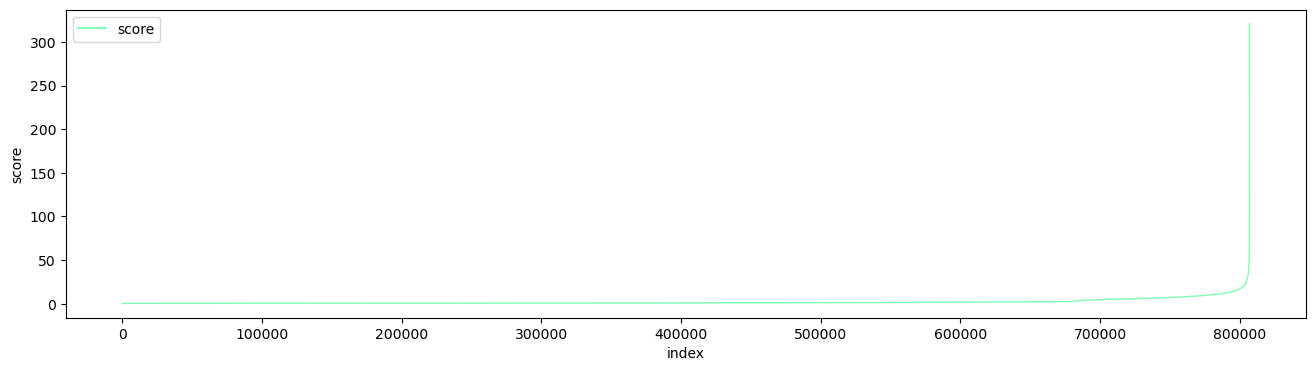

time: 5.44 s


In [27]:
# section_len >> score
wiktionary = pak.rename_col(wiktionary,'section_len','score')

# page_part 0 aufwerten
mask = (wiktionary.lemma == wiktionary.section_id2)
wiktionary.loc[mask,'score'] = wiktionary[mask].score * 3

wiktionary['score'] = pak.scale( wiktionary.score, 'compare_median')
mask = wiktionary.score < 0.01
wiktionary.loc[mask,'score'] += 0.01

%matplotlib inline
a = wiktionary.score.sort_values().reset_index(drop=True)
pak.plot(a)

In [28]:
grid(wiktionary, pak.sample)

11 rows out of 806916


time: 5.64 s


## Steuertabellen laden

In [29]:
blab.help(plan_merkmal_erstellen)

* definiert in Steuertabellen/s01_Steuertabellen.py
* `merkmal`: Name des Merkmals
* `template`: Name des Mediawiki-Templates, das diese Information enthält
* `collect`: Extractionsmethode
   * L extrahiert nur Links 
   * T extrahiert komplette Text-Absätze
   * Ü extrahiert Übersetzungen
   * P extrahiert Template-Parameter (Substring reicht)
   * E checkt nur auf Existenz
* `plan`:
   * 1: die Merkmale, die in wiktionary_merkmal gespeichert werden
   * 2: die Merkmale, die in wiktionary_merkmal_text gespeichert werden   
   * 3: Reihenfolge und Liste aller Merkmale aus flexion / übersicht <br>
        sowie die Merkmale aus named_entities und lexeme_manuell
* `sort`: Irgendwas zum Sortieren der Merkmale
* `is_lex`: Ist das Merkmal ein Lexem?    

time: 28.8 ms


In [30]:
# plan_merkmal Steuertabelle
try:
    del plan_merkmal
except:
    pass

from Steuertabellen.s01_Steuertabellen import *
plan_merkmal = plan_merkmal_erstellen()
grid(plan_merkmal)

103 rows


time: 243 ms


In [31]:
# translate_tag: Wortarten >> tags

try:
    del translate_tag
except:
    pass

from Steuertabellen.s01_Steuertabellen import *
grid(translate_tag)

179 rows


time: 80.8 ms


In [32]:
# translate_tagZ: tag >> tagZ und tagZZ

try:
    del translate_tagZ
except:
    pass

from Steuertabellen.s01_Steuertabellen import *
grid(translate_tagZ)

62 rows


time: 110 ms


In [33]:
# lex_test, lemma_test
lex_test, lemma_test = lade_lex_text( lex_test_filename, level=1)
grid(lemma_test)

74 rows loaded
Delete 15 rows from 74
49 rows


time: 1.05 s


## Löschliste
* Excel-Datei aufbereiten
* wiktionary belöschen
* wiktionary_merkmal belöschen
* Falls löschliste und lexeme_manuell in Konflikt stehen, siegt lexeme_manuell. Es wird erst gelöscht und dann manuell ergänzt.

In [34]:
# Laden
löschliste = pak.load_excel( löschliste_filename )

379 rows loaded
time: 201 ms


In [35]:
# Format prüfen
löschliste['check'] = löschliste.isnull().sum(axis=1)
mask = löschliste.check != 2
error = check_mask(löschliste,mask,0, stop=False)
grid(löschliste,mask, color='green')

check_mask:  0 rows
No rows, mask filters them all away
time: 85.4 ms


In [36]:
löschliste = pak.drop_cols(löschliste,'check')
bpy.raise_if(error)

time: 55.2 ms


In [37]:
# Einzelne löschlisten

mask = löschliste.section_id2.notnull()
löschliste_section_id2 = list(löschliste[mask].drop_duplicates().section_id2)

mask = löschliste.lemma.notnull()
löschliste_lemma = list(löschliste[mask].drop_duplicates().lemma)

mask = löschliste.lex.notnull()
löschliste_lex = list(löschliste[mask].drop_duplicates().lex)
löschliste_lex += löschliste_lemma

time: 56.2 ms


In [38]:
# löschliste_lemma nach löschliste_section_id2 übertragen
mask1 =  wiktionary.title.isin(löschliste_lemma)   &   (wiktionary.title == wiktionary.lemma)
mask2 = ~wiktionary.section_id2.isin(löschliste_section_id2)
mask = mask1  &  mask2
#wiktionary[mask]
löschliste_section_id2 += list(wiktionary[mask].section_id2)

time: 243 ms


In [39]:
# wiktionary belöschen nach section_id2
mask = wiktionary.section_id2.isin(löschliste_section_id2)   
wiktionary, wiktionary_trash = pak.move_rows( df_from=wiktionary, df_to=wiktionary_trash, mask=mask, msg='löschliste_section_id2' )       # Löschen

Move 288 rows from 806916
time: 683 ms


In [40]:
# wiktionary belöschen nach lex
mask = wiktionary.title.isin(löschliste_lex)   
wiktionary, wiktionary_trash = pak.move_rows( df_from=wiktionary, df_to=wiktionary_trash, mask=mask, msg='löschliste_lex' )       # Löschen

Move 51 rows from 806628
time: 683 ms


In [41]:
# wiktionary_merkmal belöschen nach section_id2
mask = wiktionary_merkmal.section_id2.isin(löschliste_section_id2) 
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows(df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='löschliste_section_id2')

mask = wiktionary_merkmal_trash.msg == 'löschliste_section_id2'
grid(wiktionary_merkmal_trash,mask)

Move 3568 rows from 3137375
3568 rows


time: 2.05 s


In [42]:
# wiktionary_merkmal belöschen nach lex
mask = wiktionary_merkmal.data.isin(löschliste_lex) 
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows(df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='löschliste_lex')

mask = wiktionary_merkmal_trash.msg == 'löschliste_lex'
grid(wiktionary_merkmal_trash,mask)

Move 654 rows from 3133807
654 rows out of 4222


time: 1.92 s


In [43]:
# aufräumen
del löschliste_lemma
del löschliste

time: 44.5 ms


## wiktionary tag und member
* Aus dem Feld pos entstehen die Felder tag (standardisiert) und member (vollständig)

In [44]:
# Kaputte Datenstruktur in str wandeln
wiktionary['tag'] = wiktionary.pos.apply( lambda x: str(x) )
wiktionary = pak.move_cols(wiktionary,'tag','pos')

# translate
translate_chars = str.maketrans("{}'[]:", "     ,")
wiktionary.tag = wiktionary.tag.str.translate(translate_chars)

# Liste ohne Dups draus machen
wiktionary.tag = wiktionary.tag.str.split(",")
wiktionary.tag = wiktionary.tag.apply( lambda x: list(set(x)) )

# Strings pflegen
wiktionary.tag = wiktionary.tag.apply( lambda x: [ e.strip().replace(' ','_')  for e in x ] )

# Leere Strings entfernen
wiktionary.tag = wiktionary.tag.apply( lambda x: [ e for e in x  if e != ''] )

time: 6.29 s


In [45]:
#grid(wiktionary, pak.sample)

time: 31.2 ms


In [46]:
# nach Priorität sortieren (laut Steuertabellen)
wiktionary.loc[:,'tag'] = member_sortieren(wiktionary.tag) 

time: 2.23 s


In [47]:
# In string wandeln
wiktionary.tag = wiktionary.tag.str.join(' ')

time: 235 ms


In [48]:
# translate_first

print(translate_first1)
print(translate_first2)

wiktionary['tag'] = pak.replace_str( wiktionary.tag, translate_first1).str.strip()
wiktionary['tag'] = pak.replace_str( wiktionary.tag, translate_first2).str.strip()

[('  ', ' '), ('Partizip II', 'Ptz2'), ('Partizip_II', 'Ptz2'), ('PartizipII', 'Ptz2'), ('Konjunktiv II', 'Konj2'), ('Konjunktiv_II', 'Konj2'), ('KonjunktivII', 'Konj2'), ('  ', ' ')]
[('  ', ' '), ('Partizip I', 'Ptz1'), ('Partizip_I', 'Ptz1'), ('PartizipI', 'Ptz1'), ('Konjunktiv I', 'Konj1'), ('Konjunktiv_I', 'Konj1'), ('KonjunktivI', 'Konj1'), ('  ', ' ')]
time: 4.05 s


In [49]:
#mask = (wiktionary.tag.str.count(' ') + 1)  > 2   
#wiktionary[mask]

time: 35 ms


In [50]:
grid(wiktionary, pak.sample)

11 rows out of 806577


time: 7.58 s


In [51]:
pak.analyse_cols(wiktionary)

col_name datatype_instance    datatype datatype_short datatype_suggest  \
0     __index__             int64    np.int64          int64         np.int32   
1       page_id             int64    np.int64          int64         pd.Int32   
2     page_part             int64    np.int64          int64          pd.Int8   
3   section_id2               str      object         object        pd.string   
4         title               str      object         object        pd.string   
5         lemma               str      object         object        pd.string   
6     inflected             bool_        bool           bool                    
7           pos              dict      object         object                    
8           tag               str      object         object        pd.string   
9        rhymes              list      object         object                    
10        score           float64  np.float64        float64       np.float32   
11      flexion       defaultdict      object         object                    
12          ipa              list      object         object                    
13    syllables              list      object         object                    
14         lang               str      object         object        pd.string   
15    lang_code               str      object         object        pd.string   
16        error               str      object         object        pd.string   
17  lemma_lower               str      object         object        pd.string   

    is_numeric  is_string  is_hashable  nan_allowed mem_usage  ntypes  \
0         True      False         True        False    80.0 B       1   
1         True      False         True        False    80.0 B       1   
2         True      False         True        False    80.0 B       1   
3        False       True         True         True   722.0 B       1   
4        False       True         True         True   720.0 B       1   
5        False       True         True         True   676.0 B       1   
6         True      False         True         True    10.0 B       1   
7        False       True        False         True    2.2 KB       1   
8        False       True         True         True   686.0 B       1   
9        False       True        False         True   464.0 B       1   
10        True      False         True         True    80.0 B       1   
11       False       True        False         True    2.8 KB       1   
12       False       True        False         True   784.0 B       1   
13       False       True        False         True    1.1 KB       1   
14       False       True         True         True   640.0 B       1   
15       False       True         True         True   590.0 B       1   
16       False       True         True         True   570.0 B       1   
17       False       True         True         True   676.0 B       1   

    nunique    nnan   ndups       n                      vmin      vmean  \
0    806577       0       0  806577                       0.0  403501.35   
1    771982       0   34595  806577                       0.0  603389.28   
2         6       0  806571  806577                       0.0       0.05   
3    806577       0       0  806577                       &c.        NaN   
4    771981       0   34596  806577                       &c.        NaN   
5    153537       0  653040  806577                       &c.        NaN   
6         2       0  806575  806577                       0.0       0.83   
7       163       0  806414  806577                       NaN        NaN   
8       156       0  806421  806577                 Abkürzung        NaN   
9     38306  503544  264727  806577                       [a]        NaN   
10    10488       0  796089  806577                      0.01       2.15   
11   118070       0  688507  806577                       NaN        NaN   
12   745079   14229   47269  806577                      [-a]        NaN   
13   766354    

time: 10.2 s


In [52]:
# Spalte member bewahrt die ursprüngliche Klassifizierung vollständig
wiktionary['member'] = wiktionary.tag.copy()
wiktionary = pak.move_cols(wiktionary,'member','tag')

time: 901 ms


In [53]:
# wiktionary anschauen
#mask = wiktionary.tag == 'ADJA ADV PRO'
mask = wiktionary.title.isin( suche_debug )
grid(wiktionary,mask)

3 rows out of 806577


time: 127 ms


In [54]:
grid(translate_tag)

179 rows


time: 110 ms


In [55]:
# anwenden
wiktionary['tag'] = pak.replace_str( wiktionary.tag, translate_tag )
wiktionary['tag'] = wiktionary.tag.str.replace('  ',' ').str.strip()    

time: 42.1 s


In [56]:
# Durchlauf2: translate_tag erneut anwenden 
mask = translate_tag.notiz.str.contains('Durchlauf2')
wiktionary['tag'] = pak.replace_str( wiktionary.tag, translate_tag[mask] )
wiktionary['tag'] = wiktionary.tag.str.replace('  ',' ').str.strip()    

time: 15.7 s


In [57]:
# tag TODO für alles, was noch weiterverarbeitet werden muss
mask = (wiktionary.tag.str.len() == 0)
wiktionary.loc[mask,'tag'] = 'TODO'
#grid(wiktionary,mask)

time: 287 ms


In [58]:
# wiktionary anschauen
#mask = wiktionary.tag == 'ADJA ADV PRO'
mask = wiktionary.title.isin( suche_debug )
grid(wiktionary,mask)

3 rows out of 806577


time: 906 ms


In [59]:
# Dekliniertes_Gerundivum: beizubehaltende
# VMaßeinheiten

time: 51.5 ms


## Bindestrich

In [60]:
# Gebundene Adjektiv-Lexeme in wiktionary
suche = ['ober-','unter-','äußer-','inner-',]
mask = wiktionary.section_id2.isin(suche)
check_mask(wiktionary,mask,4,4)

wiktionary.loc[mask,'title']       = wiktionary[mask].title.str.replace('-','')
wiktionary.loc[mask,'lemma']       = wiktionary[mask].lemma.str.replace('-','')
wiktionary.loc[mask,'lemma_lower'] = wiktionary[mask].lemma_lower.str.replace('-','')
wiktionary.loc[mask,'member']      = 'Adjektiv'
wiktionary.loc[mask,'tag']         = 'ADJA'
wiktionary.loc[mask,'pos']         = {'Adjektiv': []}
wiktionary.loc[mask,'section_id2'] = wiktionary[mask].section_id2.str.replace('-','_glex')
wiktionary[mask]

check_mask:  4 rows


page_id  page_part section_id2  title  lemma  inflected  pos   tag  \
25823     67995          0  unter_glex  unter  unter      False  NaN  ADJA   
213892   379521          0   ober_glex   ober   ober      False  NaN  ADJA   
457097   680245          0  äußer_glex  äußer  äußer      False  NaN  ADJA   
457110   680259          0  inner_glex  inner  inner      False  NaN  ADJA   

          member rhymes      score  \
25823   Adjektiv    NaN   8.894032   
213892  Adjektiv    NaN   6.716200   
457097  Adjektiv    NaN  11.130329   
457110  Adjektiv    NaN  11.298417   

                                                  flexion         ipa  \
25823                                                  {}      [ʊntɐ]   
213892                                                 {}     [ˈoːbɐ]   
457097  {'Positiv': ['äußer(er)'], 'Superlativ': ['äuß...  [ˈɔɪ̯səʁɐ]   
457110  {'Positiv': ['inner(er)'], 'Superlativ': ['inn...      [ˈɪnɐ]   

        syllables     lang lang_code error lemma_lower  
25823   [un, ter]  Deutsch        de             unter  
213892     [ober]  Deutsch        de              ober  
457097        NaN  Deutsch        de             äußer  
457110        NaN  Deutsch        de             inner

time: 289 ms


In [61]:
# Gebundene Adjektiv-Lexeme in wiktionary_merkmal
suche = ['ober-','unter-','äußer-','inner-',]
mask = wiktionary_merkmal.section_id2.isin(suche)
check_mask(wiktionary_merkmal,mask,80)
wiktionary_merkmal.loc[mask,'section_id2'] = wiktionary_merkmal[mask].section_id2.str.replace('-','_glex')
#wiktionary_merkmal[mask]

check_mask:  80 rows
time: 312 ms


In [62]:
# Gebundene Adjektiv-Lexeme in wiktionary_merkmal_text
suche = ['ober-','unter-','äußer-','inner-',]
mask = wiktionary_merkmal_text.section_id2.isin(suche)
check_mask(wiktionary_merkmal_text,mask,46)
wiktionary_merkmal_text.loc[mask,'section_id2'] = wiktionary_merkmal_text[mask].section_id2.str.replace('-','_glex')
#wiktionary_merkmal_text[mask]

check_mask:  46 rows
time: 108 ms


In [63]:
# Gebundene Adjektiv-Lexeme in wiktionary
suche = ['ober-','unter-','äußer-','inner-',]
mask = wiktionary.lemma.isin(suche)
check_mask(wiktionary,mask,36)

wiktionary.loc[mask,'title']       = wiktionary[mask].title.str.replace('-','')
wiktionary.loc[mask,'lemma']       = wiktionary[mask].lemma.str.replace('-','')
wiktionary.loc[mask,'lemma_lower'] = wiktionary[mask].lemma_lower.str.replace('-','')
#grid(wiktionary,mask)

check_mask:  36 rows
time: 135 ms


In [64]:
# Gebundene Adjektiv-Lexeme in wiktionary_merkmal
suche = ['ober-','unter-','äußer-','inner-',]
mask = wiktionary_merkmal.data.isin(suche)
check_mask(wiktionary_merkmal,mask,0,10)
wiktionary_merkmal.loc[mask,'data'] = wiktionary_merkmal[mask].data.str.replace('-','')
wiktionary_merkmal[mask]

check_mask:  1 rows


section_id2    merkmal                   node_debug node_kontext  \
643279    unter-_1  übersicht  Deutsch Adjektiv Übersicht
      Positiv   

         data num  meta  
643279  unter      <NA>

time: 394 ms


In [65]:
# AFIX 588
mask0 = ~wiktionary.lemma.str.startswith('-')   
mask1 =  wiktionary.lemma.str.endswith('-')  
mask2 = ~wiktionary.lemma.str[0].str.isdigit()
mask3 =  wiktionary.lemma.str.len() > 1
mask4 = ~wiktionary.tag.str.contains(' ')   
mask = mask0  &  mask1  &  mask2  &  mask3  &  mask4 
pak.check_mask(wiktionary, mask, 0, 700)
#grid(wiktionary, mask)
#pak.analyse_freqs(wiktionary[mask], 'tag')
wiktionary.loc[ mask, 'tag'] = 'AFIX ' + wiktionary[mask].tag

check_mask:  547 rows
time: 1.37 s


In [66]:
# ZFIX
mask0 =  wiktionary.lemma.str.startswith('-')
mask1 = ~wiktionary.lemma.str.endswith('-')
mask2 = ~wiktionary.lemma.str[-1].str.isdigit()
mask3 =  wiktionary.lemma.str.len() > 1
mask4 = ~wiktionary.tag.str.contains(' ')   
mask = mask0  &  mask1  &  mask2  &  mask3  &  mask4 
pak.check_mask(wiktionary, mask, 0, 600)
#grid(wiktionary, mask)
#pak.analyse_freqs(wiktionary[mask], 'tag')
wiktionary.loc[ mask, 'tag'] = 'ZFIX ' + wiktionary[mask].tag

check_mask:  473 rows
time: 1.37 s


In [67]:
# MFIX >> löschen
mask0 =  wiktionary.lemma.str.startswith('-')
mask1 =  wiktionary.lemma.str.endswith('-') 
mask2 =  wiktionary.lemma.str.len() > 2
mask3 = ~wiktionary.tag.str.contains(' ')   
mask = mask0  &  mask1  &  mask2  &  mask3
check_mask(wiktionary, mask, 0, 4)
#grid(wiktionary, mask)
#analyse_freqs(wiktionary[mask], 'tag')
wiktionary, wiktionary_trash = pak.move_rows(df_from=wiktionary, df_to=wiktionary_trash, mask=mask, msg='MFIX') 

check_mask:  4 rows
Move 4 rows from 806577
time: 1.69 s


## wiktionary Einzelkorrekturen

In [68]:
# Beispiele anzeigen
mask = wiktionary.member.str.contains('VMaßeinheiten')
grid(wiktionary,mask, color=None)

No rows, mask filters them all away
time: 323 ms


In [69]:
# anschauen
a = pak.analyse_freqs( wiktionary, ['member', 'tag'], splits=[' ',None])
grid(a)

68 rows


time: 5.51 s


In [70]:
# Einzelkorrekturen        
einzelkorrekturen = { 'viel'        : 'ADJA PIAT',  # war: ADJA ADV PIAT CARD
                      'zig'         : 'ADJA',
                      'bis'         : 'KOUS APPR',      
                      'derentwegen' : 'PDAT PRELAT',
                      'Fachleute'   : 'NN',
                      'Rheinland'   : 'NE',                 
}
for i,t in einzelkorrekturen.items():
    mask = (wiktionary.section_id2 == i)
    wiktionary.loc[mask,'tag'] = t

time: 465 ms


In [71]:
# pflege_tag_felder (schreibe tagZZ usw.)
wiktionary = pflege_tag_felder(wiktionary, translate_tagZ)

time: 29.9 s


## named_entities

In [72]:
# laden
named_entities = pak.load_excel(named_entities_filename, tabcol='quelle')

4544 rows loaded
time: 875 ms


In [73]:
# Überblick
a = pak.analyse_freqs(named_entities, cols=['quelle','member','lemma'], splits=[None,' '])
grid(a)

3 rows


time: 177 ms


In [74]:
# Felder ergänzen
named_entities['title']       = named_entities.lemma
named_entities['lemma_lower'] = named_entities.lemma.str.lower() 
named_entities = pak.move_cols( named_entities, 'lemma_lower','lemma')

time: 104 ms


In [75]:
# section_id2
named_entities['section_id2'] = named_entities.lemma + '_' + named_entities.quelle.str[0].str.upper().copy()
named_entities['section_id2'] = named_entities.section_id2.str.replace(' ','_').copy()
named_entities = pak.move_cols(named_entities, ['section_id2','title'])

time: 116 ms


In [76]:
# Bekannte section_id2 aus wiktionary übertragen. Aber nur wenn der tag wirklich gleich ist.
mask = (wiktionary.lemma == wiktionary.title)  # wichtig
named_entities = pak.update_col(named_entities, wiktionary[mask], on=['lemma_lower','tag'], col='section_id2',  col_score='score' )

update_col: col_score score applied, 2213 records less!
update_col: 1242 cells written into existing column
time: 991 ms


In [77]:
# drop_cols
named_entities = pak.drop_cols(named_entities,['sex_f', 'sex_m', 'Land', 'Stadt','quelle'])

time: 42.5 ms


In [78]:
# score erhöhen
named_entities.score += 1.0
named_entities.score *= 2.0

time: 48.2 ms


In [79]:
grid(named_entities, pak.sample)

7 rows out of 4544


time: 287 ms


In [80]:
# Dups?
mask = named_entities.section_id2.duplicated()
check_mask(named_entities,mask,0,0)

check_mask:  0 rows
time: 79 ms


In [81]:
?pak.cols_to_dict

time: 100 ms


Signature:
pak.cols_to_dict(
    df,
    col_dict='',
    cols_add=[],
    use_defaultdict=False,
    drop=True,
)
Docstring:
Moves columns into a dict or defaultdict.
This is 
* col_dict:         name of the target column. Can be empty, but may already contain a dict or defaultdict. 
* cols_add:         Columns to be packed.
* use_defaultdict:  Should a defaultdict be used as data structure? Otherwise keys can only occur once.
* drop:             Should the packed columns be dropped (>> move) or not (>> copy)?
File:      ~/mambaforge/envs/python_06/lib/python3.9/site-packages/pandasklar/aggregate.py
Type:      function


In [82]:
named_entities = pak.cols_to_dict(named_entities,col_dict='flexion',cols_add=['Genus','Nom Sg','Gen Sg',], use_defaultdict=True)
named_entities

section_id2      title      lemma lemma_lower tag            member  \
0           Hagen      Hagen      Hagen       hagen  NE  Vorname Nachname   
1          Jordan     Jordan     Jordan      jordan  NE  Vorname Nachname   
2        Menzel_V     Menzel     Menzel      menzel  NE  Vorname Nachname   
3        Oswald_V     Oswald     Oswald      oswald  NE  Vorname Nachname   
4     Reinhardt_V  Reinhardt  Reinhardt   reinhardt  NE  Vorname Nachname   
...           ...        ...        ...         ...  ..               ...   
4539        Wolff      Wolff      Wolff       wolff  NE          Nachname   
4540     Wolter_N     Wolter     Wolter      wolter  NE          Nachname   
4541     Zander_2     Zander     Zander      zander  NE          Nachname   
4542     Zeller_N     Zeller     Zeller      zeller  NE          Nachname   
4543      Ziegler    Ziegler    Ziegler     ziegler  NE          Nachname   

         score                                            flexion  
0     2.989899  {'Genus': ['m'], 'Nom Sg': ['Hagen'], 'Gen Sg'...  
1     2.989899  {'Genus': ['m'], 'Nom Sg': ['Jordan'], 'Gen Sg...  
2     2.989899  {'Genus': ['m'], 'Nom Sg': ['Menzel'], 'Gen Sg...  
3     2.989899  {'Genus': ['m'], 'Nom Sg': ['Oswald'], 'Gen Sg...  
4     2.989899  {'Genus': ['m'], 'Nom Sg': ['Reinhardt'], 'Gen...  
...        ...                                                ...  
4539  2.989899        {'Nom Sg': ['Wolff'], 'Gen Sg': ['Wolffs']}  
4540  2.989899      {'Nom Sg': ['Wolter'], 'Gen Sg': ['Wolters']}  
4541  2.989899      {'Nom Sg': ['Zander'], 'Gen Sg': ['Zanders']}  
4542  2.989899      {'Nom Sg': ['Zeller'], 'Gen Sg': ['Zellers']}  
4543  2.989899    {'Nom Sg': ['Ziegler'], 'Gen Sg': ['Zieglers']}  

[4544 rows x 8 columns]

time: 2.98 s


In [83]:
grid(named_entities, pak.sample)

5 rows out of 4544


time: 368 ms


In [84]:
# anfügen
wiktionary = pak.add_rows(wiktionary, named_entities, assert_subset=True)

4544 rows added, now a total of 811117
time: 948 ms


In [85]:
# flexion type korrekt?
assert pak.ntypes(wiktionary.flexion) == 1

time: 327 ms


In [86]:
# wiktionary anschauen
mask = wiktionary.title.isin(suche_debug) 
r = wiktionary[mask].sort_values(['title','section_id2'])
grid(r)

3 rows


time: 649 ms


## Zahlwörter

In [87]:
# Wandelt eine Zahl in Worte um
def zahl_in_worten(n, s=True, z=False):
    
    w1 = "null ein zwei drei vier fünf sechs sieben acht neun zehn elf zwölf dreizehn vierzehn fünfzehn sechzehn siebzehn achtzehn neunzehn".split()
    w2 = "zwanzig dreißig vierzig fünfzig sechzig siebzig achtzig neunzig".split()    
    if n < 0: raise ValueError
    if n == 0 and z: return ""
    if n == 1 and s: return "eins"
    if n < 20: return w1[n]
    if n < 100:
        w = w2[(n - 20) // 10]
        if n % 10:
            w = w1[n % 10] + "und" + w
        return w
    if n < 1000:
        return w1[n // 100] + "hundert" + zahl_in_worten(n % 100, z=True)
    if n < 1000000:
        return zahl_in_worten(n // 1000, s=False) + "tausend" + zahl_in_worten(n % 1000, z=True)
    raise ValueError

time: 64.7 ms


In [88]:
print(zahl_in_worten(3107))

dreitausendeinhundertsieben
time: 71.7 ms


In [89]:
def zahlwörter_liste(range_): 
    return [ 
    {'lex' : [zahl_in_worten(z), str(z)], 
     'lemma' : zahl_in_worten(z),      
     'def'   : str(z),
    } for z in range_]

zahlwörter_liste(range(0,20,10))

[{'lex': ['null', '0'], 'lemma': 'null', 'def': '0'},
 {'lex': ['zehn', '10'], 'lemma': 'zehn', 'def': '10'}]

time: 48.6 ms


In [90]:
# 0..99 zahlwörter_a erzeugen
range_ = range(0,100)
zahlwörter_a = pd.DataFrame(zahlwörter_liste( range_ ))
#zahlwörter_a

time: 50.7 ms


In [91]:
# Hunderter Zahlwörter erzeugen
range_ = range(100,1000,100)
zahlwörter_b = pd.DataFrame(zahlwörter_liste( range_ ))
#zahlwörter_b

time: 54.2 ms


In [92]:
# Tausender Zahlwörter erzeugen
range_ = range(1000,99001,1000)
zahlwörter_c = pd.DataFrame(zahlwörter_liste( range_ ))
#zahlwörter_c

time: 48.8 ms


In [93]:
# Zehntausender Zahlwörter erzeugen
range_ = range(10000,99001,10000)
zahlwörter_d = pd.DataFrame(zahlwörter_liste( range_ ))
#zahlwörter_d

time: 33.3 ms


In [94]:
# Hunderttausender Zahlwörter erzeugen
range_ = range(100000,990001,100000)
zahlwörter_e = pd.DataFrame(zahlwörter_liste( range_ ))
#zahlwörter_e

time: 37.8 ms


In [95]:
# concat
zahlwörter_all = pd.concat([  zahlwörter_a, zahlwörter_b, zahlwörter_c, zahlwörter_d, zahlwörter_e,  ])

time: 38.7 ms


In [96]:
# explode lex
zahlwörter_all = zahlwörter_all.explode('lex')

time: 49 ms


In [97]:
# Sonstige Spalten
zahlwörter_all['tag']         = 'CARD'
zahlwörter_all['tag_lex']     = 'lex' # ja
zahlwörter_all['genus']       = 'f'
zahlwörter_all['member']      = 'Zahlwort'
zahlwörter_all['tab']         = 'Zahlwort' # Wird später wieder gelöscht, dient der Kompatibilität zu lexeme_manuell

time: 46.1 ms


In [98]:
# Substantive ergänzen
mask = zahlwörter_all.lex == zahlwörter_all.lemma
df = zahlwörter_all[mask].copy()
df['lex']   = df.lex.str.capitalize()
df['lemma'] = df.lex.str.capitalize()
df['tag']   = 'NN'
zahlwörter_all = pak.add_rows(zahlwörter_all, df)
#df

226 rows added, now a total of 678
time: 48.1 ms


In [99]:
# zahlwörter_all anschauen
pak.sample(zahlwörter_all)

lex               lemma     def   tag tag_lex genus  \
0                  null                null       0  CARD     lex     f   
237               10000         zehntausend   10000  CARD     lex     f   
376      achtzigtausend      achtzigtausend   80000  CARD     lex     f   
677  Neunhunderttausend  Neunhunderttausend  900000    NN     lex     f   

       member       tab  
0    Zahlwort  Zahlwort  
237  Zahlwort  Zahlwort  
376  Zahlwort  Zahlwort  
677  Zahlwort  Zahlwort

time: 183 ms


## lexeme_manuell

In [100]:
# laden
lexeme_manuell = pak.load_excel( lexeme_manuell_filename, tabcol='tab' )
lexeme_manuell = pak.move_cols(  lexeme_manuell, 'tag_lex')

1794 rows loaded
time: 347 ms


In [101]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

tag_lex                lex            lemma    tag member genus  \
61     Ptz2  gefriergetrocknet  gefriertrocknen  VVFIN   <NA>  <NA>   
90     Ptz2           mißraten        missraten  VVFIN   <NA>  <NA>   
204    Ptz2          missraten        missraten  VVFIN   <NA>  <NA>   

             tab  
61   Partizipien  
90   Partizipien  
204  Partizipien

time: 63.5 ms


In [102]:
# Partizipien falsch definiert?
mask1  = lexeme_manuell.tag_lex.str.startswith('Ptz')
mask2A = lexeme_manuell.tab != 'Partizipien'
mask2B = lexeme_manuell.tag != 'VVFIN'
mask = mask1  &  (mask2A | mask2B)
check_mask(lexeme_manuell,mask,0)
#lexeme_manuell[mask]

check_mask:  0 rows
time: 46.8 ms


In [103]:
# Abkürzungen falsch definiert?
# Das Schlüsselwort 'Abkürzung' darf nirgends in lexeme_manuell vorkommen.
mask1A = lexeme_manuell.member.str.contains('Abkürzung')
mask1B = lexeme_manuell.member.str.contains('Abkürzung')
mask = (mask1A | mask1B) 
check_mask(lexeme_manuell,mask,0)
lexeme_manuell[mask]

check_mask:  0 rows


Empty DataFrame
Columns: [tag_lex, lex, lemma, tag, member, genus, tab]
Index: []

time: 57.1 ms


In [104]:
pak.sample(zahlwörter_all)

lex               lemma     def   tag tag_lex genus  \
0                  null                null       0  CARD     lex     f   
237               10000         zehntausend   10000  CARD     lex     f   
376      achtzigtausend      achtzigtausend   80000  CARD     lex     f   
677  Neunhunderttausend  Neunhunderttausend  900000    NN     lex     f   

       member       tab  
0    Zahlwort  Zahlwort  
237  Zahlwort  Zahlwort  
376  Zahlwort  Zahlwort  
677  Zahlwort  Zahlwort

time: 208 ms


In [105]:
# assert subset
assert set(zahlwörter_all.columns) - set(['def']) <= set(lexeme_manuell.columns)

time: 52.1 ms


In [106]:
# zahlwörter_all anfügen
lexeme_manuell = pak.add_rows(lexeme_manuell, zahlwörter_all)

678 rows added, now a total of 2472
time: 46.3 ms


In [107]:
# tab analysieren
pak.analyse_freqs( lexeme_manuell, cols='tab')

tab  tab_count  tab_percent           graph
0       esszett        729         29.5  ##############
1      Zahlwort        678         27.4   #############
2   Partizipien        414         16.7        ########
3      Diverses        299         12.1          ######
4  Abkuerzungen        156          6.3             ###
5            FM        102          4.1              ##
6       Symbole         48          1.9                
7      Partikel         44          1.8                
8         Namen          2          0.1

time: 71.1 ms


In [108]:
# NaN

# def
lexeme_manuell['def'] = lexeme_manuell['def'].fillna('')

# member
mask = lexeme_manuell.member.isnull()   |   lexeme_manuell.member.isin(['nan'])
lexeme_manuell.loc[mask,'member'] = ''
lexeme_manuell.member += ' manuell'

# lemma und lex
mask = lexeme_manuell.lemma.isnull()   |   lexeme_manuell.lemma.isin(['nan',''])
lexeme_manuell.loc[mask,'lemma'] = lexeme_manuell[mask].lex
lexeme_manuell.loc[mask,'member'] += ' ergänzt'

mask = lexeme_manuell.lex.isnull()   |   lexeme_manuell.lex.isin(['nan',''])
lexeme_manuell.loc[mask,'lex'] = lexeme_manuell[mask].lemma
lexeme_manuell.loc[mask,'member'] += ' ergänzt'

# genus
mask = lexeme_manuell.genus.isnull()   |   lexeme_manuell.genus.isin(['nan'])
lexeme_manuell.loc[mask,'genus'] = ''

# tag_lex
mask = lexeme_manuell.tag_lex.isnull()   |   lexeme_manuell.tag_lex.isin(['nan'])
lexeme_manuell.loc[mask,'tag_lex'] = ''

mask = (lexeme_manuell.lex != lexeme_manuell.lemma)   &   (lexeme_manuell.tag_lex == '')
lexeme_manuell.loc[mask,'tag_lex'] = 'lex'

mask = (lexeme_manuell.lex == lexeme_manuell.lemma)   &   (  (lexeme_manuell.tag_lex == 'lex')  | (lexeme_manuell.tag_lex == '')  )
lexeme_manuell.loc[mask,'tag_lex'] = 'lemma'

# tag
mask = lexeme_manuell.tag.isnull()   |   lexeme_manuell.tag.isin(['nan',''])
check_mask( lexeme_manuell, mask, 0, 0)

# Abschluss
lexeme_manuell.member = lexeme_manuell.member.str.strip()
lexeme_manuell = pak.rename_col(lexeme_manuell, 'genus','Genus')

#lexeme_manuell = pak.move_cols(lexeme_manuell, ['Genus','abk'], -1)
#lexeme_manuell['abk'] = ''

check_mask:  0 rows
time: 95.9 ms


In [109]:
# Dups löschen
mask = lexeme_manuell.duplicated()
lexeme_manuell, df = pak.move_rows(lexeme_manuell,mask)
grid(df)

Move 104 rows from 2472
104 rows


time: 100 ms


In [110]:
pak.sample(lexeme_manuell)

tag_lex                 lex               lemma    tag  \
0       Ptz2           abberufen           abberufen  VVFIN   
482      lex                Kids                 Kid     NN   
497      lex              musses              müssen  VMFIN   
554      ADV            zu viele             zu viel    ADV   
653    lemma                  5G                  5G     NN   
713      lex                   ❀                   _     $(   
715      syn                   [                   (     $(   
748    lemma                   !                   !     $.   
751    lemma                   …                   …     $(   
1014     lex               gewiß              gewiss    ADV   
1673     lex               Mo-Fr      Montag-Freitag     NN   
2471   lemma  Neunhunderttausend  Neunhunderttausend     NN   

                              member Genus           tab     def  
0                            manuell         Partizipien          
482                          manuell     n      Diverses          
497                          manuell            Diverses          
554                          manuell            Diverses          
653                  manuell ergänzt            Diverses          
713                          manuell             Symbole          
715                          manuell             Symbole          
748                  manuell ergänzt             Symbole          
751                  manuell ergänzt             Symbole          
1014            modal lexAlt manuell             esszett          
1673  Einheit Wortverbindung manuell        Abkuerzungen          
2471                Zahlwort manuell     f      Zahlwort  900000

time: 416 ms


In [111]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

tag_lex                lex            lemma    tag   member Genus  \
61     Ptz2  gefriergetrocknet  gefriertrocknen  VVFIN  manuell         
90     Ptz2           mißraten        missraten  VVFIN  manuell         
204    Ptz2          missraten        missraten  VVFIN  manuell         

             tab def  
61   Partizipien      
90   Partizipien      
204  Partizipien

time: 78.4 ms


In [112]:
# strip
for c in lexeme_manuell.columns:
    lexeme_manuell[c] = lexeme_manuell[c].str.replace('  ',' ').str.strip()

time: 92.5 ms


In [113]:
# member analysieren
pak.analyse_freqs( lexeme_manuell, cols='member', splits=' ')

member  member_count  member_percent                         graph
0          manuell          2368            57.1  ############################
1           lexAlt           653            15.7                       #######
2         Zahlwort           651            15.7                       #######
3          ergänzt           345             8.3                          ####
4          Einheit            56             1.3                              
5              PRE            42             1.0                              
6   Wortverbindung            28             0.7                              
7              Ort             2             0.0                              
8            modal             1             0.0                              
9             Land             1             0.0                              
10         Vorname             1             0.0                              
11         Toponym             1             0.0

time: 88.2 ms


In [114]:
# Derzeit nicht nötig: Ersetzungen im member
r = {  'Partizip1'          :  'Ptz1',        
       'Partizip_1'         :  'Ptz1',       
       'Partizip2'          :  'Ptz2',        
       'Partizip_2'         :  'Ptz2',   
       'Abkürzungen'        :  'Abkürzung',      
       'Abkürzung Abkürzung':  'Abkürzung',        
    }
lexeme_manuell['member'] = pak.replace_str(lexeme_manuell.member, r)
#grid(lexeme_manuell)

time: 56.2 ms


In [115]:
# Partizipien: tag_lex setzen 
mask = lexeme_manuell.member.str.contains('Ptz1')
lexeme_manuell.loc[mask,'tag_lex'] = 'Ptz1'

mask = lexeme_manuell.member.str.contains('Ptz2')
lexeme_manuell.loc[mask,'tag_lex'] = 'Ptz2'

time: 56.2 ms


In [116]:
# These: Auch member muss gesetzt werden, weil Partizipien ja doppelt eingetragen werden
# NEIN: Das Partizip wandert ja nach flexion
#mask1 =  lexeme_manuell.tag_lex.str.startswith('Ptz')
#mask2 = ~lexeme_manuell.member.str.contains('Ptz1')
#mask3 = ~lexeme_manuell.member.str.contains('Ptz2')
#mask = mask1  &  mask2  &  mask3
#lexeme_manuell.loc[mask,'member'] = lexeme_manuell[mask].member + ' ' + lexeme_manuell[mask].tag_lex
#grid(lexeme_manuell[mask])

time: 46.2 ms


In [117]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

tag_lex                lex            lemma    tag   member Genus  \
61     Ptz2  gefriergetrocknet  gefriertrocknen  VVFIN  manuell         
90     Ptz2           mißraten        missraten  VVFIN  manuell         
204    Ptz2          missraten        missraten  VVFIN  manuell         

             tab def  
61   Partizipien      
90   Partizipien      
204  Partizipien

time: 73.8 ms


In [118]:
# Tab Esszett: tag_lex setzen
mask1 = lexeme_manuell.tab == 'esszett'
mask2A = lexeme_manuell.tag_lex == ''
mask2B = lexeme_manuell.tag_lex == 'lex'
mask = mask1  &  (mask2A | mask2B)
check_mask(lexeme_manuell,mask)
lexeme_manuell.loc[mask,'tag_lex'] = 'lexAlt'

check_mask:  653 rows
time: 38.8 ms


In [119]:
# Tab Esszett: member setzen
mask1 =  lexeme_manuell.tab == 'esszett'
mask2 = ~lexeme_manuell.member.str.contains('lexAlt')
mask = mask1  &  mask2
check_mask(lexeme_manuell,mask)
lexeme_manuell.loc[mask,'member'] += 'lexAlt'

check_mask:  0 rows
time: 56.3 ms


In [120]:
# Tab Abkuerzungen: tag_lex setzen
mask = (lexeme_manuell.tab == 'Abkuerzungen')
lexeme_manuell.loc[mask,'tag_lex'] = 'abk'

mask = lexeme_manuell.member.str.contains('Abkürzung')
lexeme_manuell.loc[mask,'tag_lex'] = 'abk'

time: 47.1 ms


In [121]:
# anschauen
pak.sample(lexeme_manuell)

tag_lex                 lex               lemma    tag  \
0       Ptz2           abberufen           abberufen  VVFIN   
482      lex                Kids                 Kid     NN   
497      lex              musses              müssen  VMFIN   
554      ADV            zu viele             zu viel    ADV   
653    lemma                  5G                  5G     NN   
713      lex                   ❀                   _     $(   
715      syn                   [                   (     $(   
748    lemma                   !                   !     $.   
751    lemma                   …                   …     $(   
1014  lexAlt               gewiß              gewiss    ADV   
1673     abk               Mo-Fr      Montag-Freitag     NN   
2471   lemma  Neunhunderttausend  Neunhunderttausend     NN   

                              member Genus           tab     def  
0                            manuell         Partizipien          
482                          manuell     n      Diverses          
497                          manuell            Diverses          
554                          manuell            Diverses          
653                  manuell ergänzt            Diverses          
713                          manuell             Symbole          
715                          manuell             Symbole          
748                  manuell ergänzt             Symbole          
751                  manuell ergänzt             Symbole          
1014            modal lexAlt manuell             esszett          
1673  Einheit Wortverbindung manuell        Abkuerzungen          
2471                Zahlwort manuell     f      Zahlwort  900000

time: 278 ms


In [122]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

tag_lex                lex            lemma    tag   member Genus  \
61     Ptz2  gefriergetrocknet  gefriertrocknen  VVFIN  manuell         
90     Ptz2           mißraten        missraten  VVFIN  manuell         
204    Ptz2          missraten        missraten  VVFIN  manuell         

             tab def  
61   Partizipien      
90   Partizipien      
204  Partizipien

time: 83.8 ms


In [123]:
# tag_lex analysieren
r = pak.analyse_freqs(lexeme_manuell, ['tag_lex', 'lex', 'member'], splits=[None,None,' '])
grid(r)

11 rows


time: 124 ms


In [124]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

tag_lex                lex            lemma    tag   member Genus  \
61     Ptz2  gefriergetrocknet  gefriertrocknen  VVFIN  manuell         
90     Ptz2           mißraten        missraten  VVFIN  manuell         
204    Ptz2          missraten        missraten  VVFIN  manuell         

             tab def  
61   Partizipien      
90   Partizipien      
204  Partizipien

time: 97 ms


In [125]:
# Kopie erzeugen, verwenden wir später um alle Partizipien als Adjektive einpflegen zu können
lexeme_manuell_copy = lexeme_manuell.copy()

time: 60.5 ms


In [126]:
# Spalte flexion erstellen
lexeme_manuell['lex_bak'] = lexeme_manuell.lex.copy()
lexeme_manuell = pak.implode_to_defaultdict(lexeme_manuell, col_key='tag_lex', col_value='lex', col_result='flexion')

0 rows less, now 2368 rows
time: 2.12 s


In [127]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

lemma    tag   member Genus          tab def  \
1329  gefriertrocknen  VVFIN  manuell        Partizipien       
1545        missraten  VVFIN  manuell        Partizipien       
1546        missraten  VVFIN  manuell        Partizipien       

                lex_bak                          flexion  
1329  gefriergetrocknet  {'Ptz2': ['gefriergetrocknet']}  
1545          missraten          {'Ptz2': ['missraten']}  
1546           mißraten           {'Ptz2': ['mißraten']}

time: 58 ms


In [128]:
# lex == lemma: flexion soll leeres defaultdict sein
mask = (lexeme_manuell.lex_bak == lexeme_manuell.lemma) 
lexeme_manuell.loc[mask,'flexion'] = lexeme_manuell[mask].flexion.apply(lambda x: defaultdict(list))  # auf leeres defaultdict setzen
lexeme_manuell = pak.drop_cols(lexeme_manuell, 'lex_bak')
#grid(lexeme_manuell,~mask)

time: 39.4 ms


In [129]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

lemma    tag   member Genus          tab def  \
1329  gefriertrocknen  VVFIN  manuell        Partizipien       
1545        missraten  VVFIN  manuell        Partizipien       
1546        missraten  VVFIN  manuell        Partizipien       

                              flexion  
1329  {'Ptz2': ['gefriergetrocknet']}  
1545                               {}  
1546           {'Ptz2': ['mißraten']}

time: 74 ms


In [130]:
# Weitere Spalten in flexion verpacken (mit cols_to_defaultdict
lexeme_manuell = pak.cols_to_defaultdict(  lexeme_manuell, col_dict='flexion', cols_add=['Genus','def']   )  

time: 266 ms


In [131]:
# Spalte tab brauchen wir nicht mehr >> löschen
lexeme_manuell = pak.drop_cols(lexeme_manuell, ['tab'])

time: 36.2 ms


In [132]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

lemma    tag   member                          flexion
1329  gefriertrocknen  VVFIN  manuell  {'Ptz2': ['gefriergetrocknet']}
1545        missraten  VVFIN  manuell                               {}
1546        missraten  VVFIN  manuell           {'Ptz2': ['mißraten']}

time: 65.8 ms


In [133]:
# gruppieren
lexeme_manuell = pak.group_and_agg(lexeme_manuell,
                               ['lemma', 'tag',   'member',              'flexion',            ],
                               ['group', 'group',  pak.agg_words_nodup,  pak.agg_defaultdicts, ],
                               ['lemma', 'tag',   'member',              'flexion',            ]
                              )

577 rows less, now 1791 rows
time: 979 ms


In [134]:
# Felder ergänzen
lexeme_manuell['title']       = lexeme_manuell.lemma
lexeme_manuell['lemma_lower'] = lexeme_manuell.lemma.str.lower() 
lexeme_manuell = pak.move_cols( lexeme_manuell, 'lemma_lower','lemma')

time: 47.6 ms


In [135]:
# tagZ und tagZZ ermitteln
lexeme_manuell = pflege_tag_felder(lexeme_manuell, translate_tagZ)

time: 119 ms


In [136]:
# anschauen
grid(lexeme_manuell, pak.sample_100)

100 rows out of 1791


time: 265 ms


In [137]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

lemma      lemma_lower    tag  tag_0       tag_1 tagZ tagZZ  \
1090  gefriertrocknen  gefriertrocknen  VVFIN  VVFIN  E9HfVlVodG  VER     V   
1235        missraten        missraten  VVFIN  VVFIN  pEaXLD9Gtb  VER     V   

       member                          flexion            title  
1090  manuell  {'Ptz2': ['gefriergetrocknet']}  gefriertrocknen  
1235  manuell           {'Ptz2': ['mißraten']}        missraten

time: 90.9 ms


In [138]:
# anschauen: mehr als ein tag
mask = (lexeme_manuell.tag.str.split().str.len() > 1)
lexeme_manuell[mask]

lemma lemma_lower         tag  tag_0 tag_1 tagZ tagZZ   member  \
1635  welch       welch  PRELS PWAT  PRELS  PWAT  PRO     P  manuell   

                                                flexion  title  
1635  {'lex': ['welche', 'welchem', 'welchen', 'welc...  welch

time: 109 ms


In [139]:
# section_id2 schreiben
lexeme_manuell['section_id2'] = lexeme_manuell.lemma.str.replace(' ','_') + '_M'
mask = lexeme_manuell.tag == 'CARD'
lexeme_manuell.loc[mask,'section_id2'] = lexeme_manuell[mask].lemma.str.replace(' ','_') + '_Z'
lexeme_manuell = pak.move_cols(lexeme_manuell, ['section_id2','title'])

time: 51.4 ms


In [140]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

section_id2            title            lemma      lemma_lower  \
1090  gefriertrocknen_M  gefriertrocknen  gefriertrocknen  gefriertrocknen   
1235        missraten_M        missraten        missraten        missraten   

        tag  tag_0       tag_1 tagZ tagZZ   member  \
1090  VVFIN  VVFIN  E9HfVlVodG  VER     V  manuell   
1235  VVFIN  VVFIN  pEaXLD9Gtb  VER     V  manuell   

                              flexion  
1090  {'Ptz2': ['gefriergetrocknet']}  
1235           {'Ptz2': ['mißraten']}

time: 83.1 ms


In [141]:
#wiktionary

time: 30.1 ms


In [142]:
# Bekannte section_id2 aus wiktionary übertragen

mask = (wiktionary.lemma == wiktionary.title)  # wichtig! Gerade die Datensätze, die nicht darunter fallen, verursachen Probleme bei Partizipien.

# tagZZ
lexeme_manuell = pak.update_col(lexeme_manuell, wiktionary[mask], on=['lemma_lower','tagZZ'], col='section_id2',  col_score='score'  )

#tagZ
lexeme_manuell = pak.update_col(lexeme_manuell, wiktionary[mask], on=['lemma_lower','tagZ'],  col='section_id2',  col_score='score'  )

# tag
lexeme_manuell = pak.update_col(lexeme_manuell, wiktionary[mask], on=['lemma_lower','tag'],   col='section_id2',  col_score='score'  )

# Wenn ein sinnvoller tag fehlt, reicht lemma
mask = (wiktionary.lemma == wiktionary.title)   &   wiktionary.tag.str.contains('TODO')
lexeme_manuell = pak.update_col(lexeme_manuell, wiktionary[mask], on=['lemma'], col='section_id2',  col_score='score' )

update_col: col_score score applied, 3221 records less!
update_col: 1174 cells written into existing column
update_col: col_score score applied, 2242 records less!
update_col: 1150 cells written into existing column
update_col: col_score score applied, 3455 records less!
update_col: 1135 cells written into existing column
update_col: col_score score applied, 4 records less!
update_col: 34 cells written into existing column
time: 2.94 s


In [143]:
# suche_debug
search_str(lexeme_manuell, suche_debug)

section_id2            title            lemma      lemma_lower  \
1090  gefriertrocknen  gefriertrocknen  gefriertrocknen  gefriertrocknen   
1235        missraten        missraten        missraten        missraten   

        tag  tag_0       tag_1 tagZ tagZZ   member  \
1090  VVFIN  VVFIN  E9HfVlVodG  VER     V  manuell   
1235  VVFIN  VVFIN  pEaXLD9Gtb  VER     V  manuell   

                              flexion  
1090  {'Ptz2': ['gefriergetrocknet']}  
1235           {'Ptz2': ['mißraten']}

time: 67.1 ms


In [144]:
# anschauen
#grid(lexeme_manuell, pak.sample_100)

time: 34.1 ms


In [145]:
# anfügen
wiktionary = pak.add_rows(wiktionary, lexeme_manuell, assert_subset=True)

1791 rows added, now a total of 812908
time: 756 ms


In [146]:
# section_id2 ist jetzt nicht mehr eindeutig
mask = wiktionary.duplicated(subset=['section_id2'], keep=False)
check_mask(wiktionary,mask,4517) 
#a = wiktionary[mask].sort_values(['section_id2'])
#grid(a)

check_mask:  4874 rows
time: 679 ms


In [147]:
assert pak.ntypes(wiktionary.flexion) == 1

time: 244 ms


In [148]:
# wiktionary suche_debug
#grid(search_str(wiktionary, suche_debug))

time: 34.1 ms


## ipa, syllables & rhymes

In [149]:
# Datentypen sind in jeder Zeile gleich
assert pak.ntypes(wiktionary.ipa) == 1
assert pak.ntypes(wiktionary.syllables) == 1

time: 389 ms


In [150]:
# Listen zu Strings
mask = ~wiktionary.ipa.isnull()
wiktionary.loc[mask,'ipa'] = wiktionary[mask].ipa.str[0]

mask = ~wiktionary.syllables.isnull()
wiktionary.loc[mask,'syllables'] = wiktionary[mask].syllables.str.join('⇀')

mask = ~wiktionary.rhymes.isnull()
wiktionary.loc[mask,'rhymes'] = wiktionary[mask].rhymes.str[0]

time: 2.01 s


In [151]:
# cols_to_defaultdict
# 1 min
wiktionary = pak.cols_to_defaultdict( wiktionary, col_dict='flexion', cols_add=['ipa','syllables','rhymes']  )

time: 1min 33s


In [152]:
# wiktionary anschauen
grid(wiktionary, pak.sample)

14 rows out of 812908


time: 7.17 s


## flexion nach wiktionary_merkmal exploden
* hiernach muss die löschliste nochmal angewendet werden

In [153]:
# flexion: vorbereiten
mask1 = wiktionary.flexion.notnull() 
mask2 = wiktionary.flexion != {}
mask3 = wiktionary.flexion != defaultdict(list)
mask = mask1  &  mask2  &  mask3 

spalten = ['section_id2','flexion']
df = pak.explode_dict(wiktionary[spalten][mask], col_dict='flexion', col_key='node_kontext', col_value='data', from_defaultdict=True)
df['merkmal'] = 'flexion'

time: 1min 48s


In [154]:
# Beispiel anschauen
mask = df.section_id2 == suche_debug[0]
grid(df,mask)

3 rows out of 2899974


time: 974 ms


In [155]:
# Beispiel anschauen
mask = df.section_id2 == suche_debug[0]
grid(df,mask)

3 rows out of 2899974


time: 262 ms


In [156]:
# an wiktionary_merkmal anfügen
wiktionary_merkmal = pak.add_rows(wiktionary_merkmal, df, assert_subset=True)
wiktionary   = pak.drop_cols(wiktionary, ['flexion'])  

2899974 rows added, now a total of 6033127
time: 6.03 s


In [157]:
# Beispiel anschauen
mask = wiktionary_merkmal.section_id2.isin(suche_debug)
grid(wiktionary_merkmal,mask)

76 rows out of 6033127


time: 307 ms


## wiktionary in 3 Teile aufteilen

In [158]:
# suche_debug 
mask = wiktionary.title.isin(suche_debug)
grid(wiktionary[mask].sort_values(['section_id2',]))

5 rows


time: 246 ms


In [159]:
# pflege_tag_felder (zur Sicherheit noch mal)
wiktionary = pflege_tag_felder(wiktionary, translate_tagZ)

time: 24.4 s


In [160]:
# LEX-Kennzeichnung sollte eineindeutig sein, außer bei FIX
mask = wiktionary.tag.str.contains('LEX_')   &   wiktionary.tag.str.contains(' ')   &   ~wiktionary.tag.str.contains('FIX')
#grid(wiktionary,mask)
check_mask(wiktionary,mask, 0, 0)

check_mask:  0 rows
time: 825 ms


### wiktionary_partizip
* Enthält Partizipien in Form von Partizipialadjektiven
* Aber keine Verben mit Partizip-Lexem!

In [161]:
# Partizipien nach wiktionary_partizip abspalten
mask1 = wiktionary.tag == 'ADJA'
mask2 = wiktionary.member.str.contains('Ptz')  
mask = mask1  &  mask2
wiktionary, wiktionary_partizip = pak.move_rows( wiktionary, mask, msg=None )  

Move 26594 rows from 812908
time: 1.19 s


In [162]:
## verblieben in wiktionary
mask1 = (wiktionary.lemma == wiktionary.title)  
mask2 = wiktionary.lemma.isin(suche_debug) 
mask = mask1 & mask2
wiktionary[mask]

page_id  page_part        section_id2              title  \
97982    242150.0        0.0          missraten          missraten   
121110   273380.0        0.0  gefriergetrocknet  gefriergetrocknet   
783784  1054310.0        0.0    gefriertrocknen    gefriertrocknen   
812207        NaN        NaN    gefriertrocknen    gefriertrocknen   
812352        NaN        NaN          missraten          missraten   

                    lemma inflected               pos    tag  tag_0  \
97982           missraten     False      {'Verb': []}  VVFIN  VVFIN   
121110  gefriergetrocknet     False  {'Adjektiv': []}   ADJA   ADJA   
783784    gefriertrocknen     False      {'Verb': []}  VVFIN  VVFIN   
812207    gefriertrocknen       NaN               NaN  VVFIN  VVFIN   
812352          missraten       NaN               NaN  VVFIN  VVFIN   

             tag_1 tagZ tagZZ    member      score     lang lang_code error  \
97982   foLRX8vFnm  VER     V      Verb   4.472594  Deutsch        de         
121110  M9yT3byKKu  ADJ     A  Adjektiv   3.807552  Deutsch        de         
783784  TLhfFhOWFO  VER     V      Verb  14.422655  Deutsch        de         
812207  dFIK2wex3d  VER     V   manuell        NaN      NaN       NaN   NaN   
812352  hMbvB8jNwL  VER     V   manuell        NaN      NaN       NaN   NaN   

              lemma_lower  
97982           missraten  
121110  gefriergetrocknet  
783784    gefriertrocknen  
812207    gefriertrocknen  
812352          missraten

time: 329 ms


In [163]:
## jetzt in wiktionary_partizip
mask = wiktionary_partizip.lemma.isin(suche_debug) 
wiktionary_partizip[mask]

page_id  page_part       section_id2             title  \
265548   446280.0        0.0        missratend        missratend   
783793  1054319.0        0.0  gefriertrocknend  gefriertrocknend   

                  lemma inflected                           pos   tag tag_0  \
265548        missraten      True  {'Adjektiv': ['Partizip I']}  ADJA  ADJA   
783793  gefriertrocknen      True  {'Adjektiv': ['Partizip I']}  ADJA  ADJA   

             tag_1 tagZ tagZZ         member     score     lang lang_code  \
265548  OPq9O6nf5c  ADJ     A  Adjektiv Ptz1  0.579592  Deutsch        de   
783793  kaZEgQ6iRR  ADJ     A  Adjektiv Ptz1  0.467347  Deutsch        de   

       error      lemma_lower  
265548              missraten  
783793        gefriertrocknen

time: 49.3 ms


In [164]:
mask1 = wiktionary.tag == 'ADJA'
mask2 = wiktionary.lemma.isin(wiktionary_partizip.lemma) 
mask = mask1  &  mask2
wiktionary[mask]
#wiktionary, wiktionary_partizip = pak.move_rows( wiktionary, mask, msg=None )  

page_id  page_part     section_id2         title         lemma  \
2007       2843.0        2.0        wollen_2        wollen        wollen   
2287       3182.0        1.0       zwirnen_1       zwirnen       zwirnen   
3485       5079.0        0.0        befangen      befangen      befangen   
3590       5293.0        0.0       überlegen     überlegen     überlegen   
5613       8808.0        1.0      erfahren_1      erfahren      erfahren   
...           ...        ...             ...           ...           ...   
710959   978147.0        0.0          hornen        hornen        hornen   
747367  1016920.0        0.0      auserlesen    auserlesen    auserlesen   
812140        NaN        NaN       erwachsen     erwachsen     erwachsen   
812723        NaN        NaN   vorbehalten_M   vorbehalten   vorbehalten   
812728        NaN        NaN  vorenthalten_M  vorenthalten  vorenthalten   

       inflected               pos   tag tag_0       tag_1 tagZ tagZZ  \
2007       False  {'Adjektiv': []}  ADJA  ADJA  YvJjUvyek1  ADJ     A   
2287       False  {'Adjektiv': []}  ADJA  ADJA  EPMop9z3Z9  ADJ     A   
3485       False  {'Adjektiv': []}  ADJA  ADJA  ImAuItuuAQ  ADJ     A   
3590       False  {'Adjektiv': []}  ADJA  ADJA  AC1yrtZfEo  ADJ     A   
5613       False  {'Adjektiv': []}  ADJA  ADJA  DskxYKG6cs  ADJ     A   
...          ...               ...   ...   ...         ...  ...   ...   
710959     False  {'Adjektiv': []}  ADJA  ADJA  T8YRMoXdQp  ADJ     A   
747367     False  {'Adjektiv': []}  ADJA  ADJA  nPx0XLM2Ah  ADJ     A   
812140       NaN               NaN  ADJA  ADJA  rKgVvfZhJv  ADJ     A   
812723       NaN               NaN  ADJA  ADJA  2VVORfGIqe  ADJ     A   
812728       NaN               NaN  ADJA  ADJA  B0aBSNcKQY  ADJ     A   

                 member     score     lang lang_code error   lemma_lower  
2007           Adjektiv  2.836784  Deutsch        de              wollen  
2287           Adjektiv  1.147381  Deutsch        de             zwirnen  
3485           Adjektiv  9.295981  Deutsch        de            befangen  
3590           Adjektiv  6.507917  Deutsch        de           überlegen  
5613           Adjektiv  4.533496  Deutsch        de            erfahren  
...                 ...       ...      ...       ...   ...           ...  
710959         Adjektiv  3.084044  Deutsch        de              hornen  
747367         Adjektiv  4.220463  Deutsch        de          auserlesen  
812140  manuell ergänzt       NaN      NaN       NaN   NaN     erwachsen  
812723  manuell ergänzt       NaN      NaN       NaN   NaN   vorbehalten  
812728  manuell ergänzt       NaN      NaN       NaN   NaN  vorenthalten  

[73 rows x 18 columns]

time: 245 ms


### wiktionary_nolemma

In [165]:
wiktionary_nolemma       = wiktionary.head(0)
wiktionary_nolemma_trash = wiktionary.head(0)

time: 37.2 ms


In [166]:
# LEX-Datensätze nach wiktionary_nolemma verschieben
mask = wiktionary.tag.str.contains('LEX_')    
check_mask(wiktionary,mask,639734)
wiktionary, wiktionary_nolemma = pak.move_rows( df_from=wiktionary, df_to=wiktionary_nolemma, mask=mask, msg='tag_LEX' )  

check_mask:  645225 rows
Move 645225 rows from 786314
time: 4.24 s


In [167]:
# auch nach wiktionary_nolemma verschieben
mask = wiktionary.member.str.contains('Deklinierte_Form')   # 2 Datensätze
check_mask(wiktionary, mask, 0, 10)
wiktionary, wiktionary_nolemma = pak.move_rows( df_from=wiktionary, df_to=wiktionary_nolemma, mask=mask, msg='member_Deklinierte_Form' )  

check_mask:  2 rows
Move 2 rows from 141089


/tmp/ipykernel_5908/3497270118.py:4: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.



time: 2.42 s


In [168]:
# auch nach wiktionary_nolemma verschieben
mask = (wiktionary.title != wiktionary.lemma)               # Es waren mal 10 Datensätze, jetzt sind es 5501
check_mask(wiktionary, mask, 10)
wiktionary, wiktionary_nolemma = pak.move_rows( df_from=wiktionary, df_to=wiktionary_nolemma, mask=mask, msg='title_ungleich_lemma' )  

check_mask:  10 rows
Move 10 rows from 141087


/tmp/ipykernel_5908/3822427480.py:4: FutureWarning:

In a future version, object-dtype columns with all-bool values will not be included in reductions with bool_only=True. Explicitly cast to bool dtype instead.



time: 2.32 s


In [169]:
# wiktionary suche_debug
grid(search_str(wiktionary_nolemma, suche_debug))

35 rows


time: 1.41 s


In [170]:
# wiktionary_nolemma: Spalten pflegen
wiktionary_nolemma = pak.rename_col(wiktionary_nolemma, 'title', 'lex')
wiktionary_nolemma = pak.rename_col(wiktionary_nolemma, 'section_id2','nolemma_id')
wiktionary_nolemma = pak.drop_cols(wiktionary_nolemma, ['pos','tag_anz','ipa','syllables','msg','page_id','page_part','inflected','rhymes'])
#wiktionary_nolemma = pak.rename_col( wiktionary_nolemma, 'tag_0', 'tag') # Jetzt gibt es definitiv keine Mehrfachtags mehr

time: 1.86 s


In [171]:
# anschauen
pak.sample(wiktionary_nolemma)

nolemma_id               lex          lemma         tag  tag_0  \
29              lieben_1            lieben           lieb       LEX_A  LEX_A   
58               Polen_1             Polen           Pole       LEX_A  LEX_A   
11103               lift              lift         liften       LEX_V  LEX_V   
37431          Fachleute         Fachleute      Fachleute          NN     NN   
53819      durchzuhalten     durchzuhalten    durchhalten       LEX_V  LEX_V   
54153         anzudauern        anzudauern       andauern       LEX_V  LEX_V   
123288  Sprachdenkmälern  Sprachdenkmälern  Sprachdenkmal       LEX_A  LEX_A   
179493       Pressefotos       Pressefotos     Pressefoto       LEX_A  LEX_A   
414845     Körpermasse_1       Körpermasse    Körpermasse       LEX_A  LEX_A   
558381          zu_viele          zu viele        zu viel        TODO   TODO   
723206          -ablerem          -ablerem          -abel  ZFIX LEX_A   ZFIX   
776359      Wolfsjunge_1        Wolfsjunge    Wolfsjunges          NN     NN   

             tag_1    tagZ tagZZ                       member     score  \
29      JOgkJEwGzz    <NA>                   Deklinierte_Form  2.382460   
58      F4i5uCCH88    <NA>                   Deklinierte_Form  0.883673   
11103   yVMy4O4V2S    <NA>              Konjugierte_Form Verb  0.538776   
37431   fQsLHPCpnX     NOM     N  Deklinierte_Form Substantiv  8.773447   
53819   tQ0RNnKgjF    <NA>         Erweiterter_Infinitiv Verb  0.469388   
54153   4hq2czjeq9    <NA>         Erweiterter_Infinitiv Verb  0.406122   
123288  zzyRguDHtz    <NA>                   Deklinierte_Form  0.475510   
179493  000JkDLydw    <NA>                   Deklinierte_Form  0.877551   
414845  bIf1qblVpr    <NA>                   Deklinierte_Form  0.038776   
558381  p4fLUGwqEH  X_todo     X               Wortverbindung  1.412911   
723206       LEX_A     FIX     Z             Deklinierte_Form  0.685714   
776359  V2gIr2xVkD     NOM     N                   Substantiv  1.031669   

           lang lang_code error    lemma_lower  
29      Deutsch        de                 lieb  
58      Deutsch        de                 pole  
11103   Deutsch        de               liften  
37431   Deutsch        de            fachleute  
53819   Deutsch        de          durchhalten  
54153   Deutsch        de             andauern  
123288  Deutsch        de        sprachdenkmal  
179493  Deutsch        de           pressefoto  
414845  Deutsch        de          körpermasse  
558381  Deutsch        de              zu viel  
723206  Deutsch        de                -abel  
776359  Deutsch        de          wolfsjunges

time: 5.58 s


### wiktionary_lemma

In [172]:
# wiktionary_lemma: erstellen und Spalten pflegen
wiktionary_lemma       = pak.drop_cols(wiktionary, ['title','pos'])
wiktionary_lemma_trash = wiktionary_lemma.head(0)

time: 183 ms


In [173]:
del wiktionary

time: 74.3 ms


In [174]:
# wiktionary_lemma suche_debug
grid(search_str(wiktionary_lemma, suche_debug))

5 rows


time: 236 ms


## Partizipien
Die Partizipien werden<br> 
a) an wiktionary_merkmal angefügt (als Partizip-Flexion des Verbs)<br> 
b) an wiktionary_lemma angefügt   (als Adjektiv mit member Partizip)

Danach findet sich alles aus wiktionary in wiktionary_lemma und wiktionary_nolemma

### wiktionary_partizip pflegen

In [175]:
# rename_col
wiktionary_partizip = pak.rename_col(wiktionary_partizip,  'section_id2', 'adjektiv_id' )
wiktionary_partizip = pak.rename_col(wiktionary_partizip,  'title',       'adjektiv'    )
wiktionary_partizip = pak.rename_col(wiktionary_partizip,  'lemma',       'verb'        )

#wiktionary_partizip = pak.move_cols(wiktionary_partizip,'verb_lower','verb')

time: 153 ms


In [176]:
# drop_cols
lösche_spalten = ['pos','error','lang','lang_code','lemma_lower','inflected','tag_0','tag_1']
wiktionary_partizip = pak.drop_cols(wiktionary_partizip,lösche_spalten)

time: 194 ms


In [177]:
# change_datatype
wiktionary_partizip = pak.change_datatype(wiktionary_partizip)

change_datatype 
page_id              --> pd.Int32  
page_part            --> pd.Int8   
adjektiv_id          --> pd.string 
adjektiv             --> pd.string 
verb                 --> pd.string 
member               --> pd.string 
score                --> np.float32
change_datatype before: 12.6 MB after: 12.2 MB

time: 412 ms


In [178]:
# falsche Partizipien löschen
falsche_partizipien = ['sehen','hören','wollen','lassen','mögen','sollen',]
mask = wiktionary_partizip.adjektiv.isin(falsche_partizipien) 
check_mask(wiktionary_partizip, mask, 0, 6)
wiktionary_partizip, df = pak.move_rows(wiktionary_partizip, mask)
df

check_mask:  6 rows
Move 6 rows from 26594


page_id  page_part adjektiv_id adjektiv    verb   tag tagZ tagZZ  \
414        660          1     sehen_1    sehen   sehen  ADJA  ADJ     A   
1093      1459          1     hören_1    hören   hören  ADJA  ADJ     A   
2006      2843          1    wollen_1   wollen  wollen  ADJA  ADJ     A   
2015      2852          1    lassen_1   lassen  lassen  ADJA  ADJ     A   
6174     10018          1     mögen_1    mögen   mögen  ADJA  ADJ     A   
10302    17727          1    sollen_1   sollen  sollen  ADJA  ADJ     A   

              member     score msg  
414    Adjektiv Ptz2  1.460414   8  
1093   Adjektiv Ptz2  1.046285   8  
2006   Adjektiv Ptz2  0.808163   8  
2015   Adjektiv Ptz2  0.671429   8  
6174   Adjektiv Ptz2  0.673469   8  
10302  Adjektiv Ptz2  0.818367   8

time: 201 ms


In [179]:
#grid(wiktionary_partizip)

time: 31.2 ms


In [180]:
# wiktionary suche_debug
grid(search_str(wiktionary_partizip, suche_debug))

2 rows


time: 186 ms


In [181]:
# So sehen normale Partizipien 1 aus
mask1 = wiktionary_partizip.verb.str.endswith(verbendungen)
mask2 = wiktionary_partizip.member.str.contains('Ptz1')
mask = mask1 & mask2
grid(wiktionary_partizip,mask)

13263 rows out of 26588


time: 372 ms


In [182]:
# Dies sind kaputte Partizipien 1: Das verb ist falsch, kann aber leicht korrigiert werden
mask1 = ~wiktionary_partizip.verb.str.endswith(verbendungen)
mask2 =  wiktionary_partizip.member.str.contains('Ptz1')
mask3 =  wiktionary_partizip.adjektiv == wiktionary_partizip.verb
mask4 =  wiktionary_partizip.verb.str.endswith(('end','ernd'))
mask = mask1  &  mask2  &  mask3  &  mask4

wiktionary_partizip.loc[mask,'verb'] = wiktionary_partizip[mask].verb.str[:-1]
grid(wiktionary_partizip,mask)

11 rows out of 26588


time: 201 ms


In [183]:
# So sehen normale Partizipien 2 aus
mask1 = wiktionary_partizip.verb.str.endswith(verbendungen)
mask2 = wiktionary_partizip.member.str.contains('Ptz2')
mask = mask1 & mask2
grid(wiktionary_partizip,mask)

13310 rows out of 26588


time: 499 ms


In [184]:
# Dies sind kaputte Partizipien 2: Das verb ist falsch, kann auch nicht gut korrigiert werden.
mask1 = ~wiktionary_partizip.verb.str.endswith(verbendungen)
mask2 = wiktionary_partizip.member.str.contains('Ptz2')
mask3 = wiktionary_partizip.adjektiv == wiktionary_partizip.verb
mask4 = wiktionary_partizip.verb.str.endswith('t')
mask = mask1  &  mask2  &  mask3  &  mask4
grid(wiktionary_partizip,mask)

4 rows out of 26588


time: 214 ms


In [185]:
# Kaputte Partizipien 2 löschen
check_mask(wiktionary_partizip,mask,0,10)
wiktionary_partizip = pak.drop_rows(wiktionary_partizip,mask)

check_mask:  4 rows
Delete 4 rows from 26588
time: 114 ms


In [186]:
# Gibt es weitere kaputte Partizipien?
mask = ~wiktionary_partizip.verb.str.endswith(verbendungen)
check_mask(wiktionary_partizip,mask,0)
#grid(wiktionary_partizip,mask)

check_mask:  0 rows
time: 65.5 ms


In [187]:
# Wenn es verb nicht auch als Wort gibt, dann ist das Müll und kann weg.
# Wenn man das nicht will: Als Partizipien in lexeme_manuell aufnehmen!

mask = ~wiktionary_partizip.verb.isin(wiktionary_lemma.lemma)
check_mask(wiktionary_partizip,mask,0,10)
wiktionary_partizip,df = pak.move_rows(wiktionary_partizip,mask)
df

check_mask:  5 rows
Move 5 rows from 26584


page_id  page_part adjektiv_id    adjektiv       verb   tag tagZ  \
7288      12269          2  versiert_2    versiert  versieren  ADJA  ADJ   
27682     72264          1    gesamt_1      gesamt      samen  ADJA  ADJ   
450813   673105          0  wullackend  wullackend  wullacken  ADJA  ADJ   
450814   673106          0  gewullackt  gewullackt  wullacken  ADJA  ADJ   
529769   788254          0     mechend     mechend     mechen  ADJA  ADJ   

       tagZZ         member     score msg  
7288       A  Adjektiv Ptz2  0.710204   8  
27682      A  Adjektiv Ptz2  0.516327   8  
450813     A  Adjektiv Ptz1  0.453061   8  
450814     A  Adjektiv Ptz2  0.400000   8  
529769     A  Adjektiv Ptz1  0.436735   8

time: 136 ms


In [188]:
mask = wiktionary_lemma.tagZZ == 'V'
pak.analyse_freqs( wiktionary_lemma[mask], ['tag', 'member'])
#wiktionary_lemma[mask]

tag  tag_count  tag_percent  \
0  VVFIN      14052         99.9   
1  VAFIN          7          0.0   
2  VMFIN          7          0.0   

                                              member  \
0  [Verb, manuell, lexAlt manuell, Verb Wortverbi...   
1                          [Verb Hilfsverb, manuell]   
2                          [manuell, lexAlt manuell]   

                     member_count  
0  [13516, 402, 84, 37, 11, 1, 1]  
1                          [4, 3]  
2                          [6, 1]

time: 179 ms


In [189]:
# verb_id ermitteln
mask = wiktionary_lemma.tagZZ == 'V'
wiktionary_partizip = pak.update_col( wiktionary_partizip,  wiktionary_lemma[mask], 
                                      left_on='verb',       right_on='lemma', 
                                      col_rename='verb_id', col='section_id2',    
                                                            col_score='score' 
                                    )
wiktionary_partizip = pak.move_cols(wiktionary_partizip, 'verb_id','adjektiv')

update_col: col_score score applied, 873 records less!
update_col: 26578 cells written into new column
time: 332 ms


In [190]:
# keine verb_id? Dann ist das Müll und kann weg.
# Wenn man das nicht will: Als Partizipien in lexeme_manuell aufnehmen!

mask = wiktionary_partizip.verb_id.isnull()
check_mask(wiktionary_partizip,mask,0,5)
wiktionary_partizip,df = pak.move_rows(wiktionary_partizip,mask)
df

check_mask:  1 rows
Move 1 rows from 26579


page_id  page_part  adjektiv_id   adjektiv verb_id       verb   tag  \
39483   107564          1  betroffen_1  betroffen     NaN  betroffen  ADJA   

      tagZ tagZZ         member     score msg  
39483  ADJ     A  Adjektiv Ptz2  0.357143   8

time: 95.3 ms


In [191]:
# member pflegen. Enthält danach genau Ptz1 x-oder Ptz2.
wiktionary_partizip['member'] = pak.remove_str(wiktionary_partizip.member,['Adjektiv','Wortverbindung'])
mask = ~wiktionary_partizip.member.isin(['Ptz1','Ptz2'])
check_mask(wiktionary_partizip,mask,0)
mask = wiktionary_partizip.member.isnull()  |  (wiktionary_partizip.member=='')
check_mask(wiktionary_partizip,mask,0)

check_mask:  0 rows
check_mask:  0 rows
time: 124 ms


In [192]:
# Dups sollten eigentlich nicht drin sein
mask = wiktionary_partizip.duplicated()
check_mask(wiktionary_partizip,mask,0)

check_mask:  0 rows
time: 154 ms


In [193]:
# wiktionary_partizip.member analysieren
#r = pak.analyse_freqs( wiktionary_partizip, ['member', 'verb','adjektiv'])
#r

time: 48.9 ms


In [194]:
mask = wiktionary_partizip.adjektiv.isin(['betroffen','dienend'])
wiktionary_partizip[mask]

page_id  page_part adjektiv_id adjektiv verb_id    verb   tag tagZ  \
61315   143534          0     dienend  dienend  dienen  dienen  ADJA  ADJ   

      tagZZ member     score  
61315     A   Ptz1  1.381242

time: 84.7 ms


### Partizipien als Flexion des Verbs eintragen

In [195]:
#wiktionary_merkmal

time: 43.7 ms


In [196]:
# wiktionary_merkmal_partizip
wiktionary_merkmal_partizip = wiktionary_partizip.copy()
wiktionary_merkmal_partizip = pak.rename_col(wiktionary_merkmal_partizip, 'member',      'merkmal')
wiktionary_merkmal_partizip = pak.rename_col(wiktionary_merkmal_partizip, 'verb_id',     'section_id2')
wiktionary_merkmal_partizip = pak.rename_col(wiktionary_merkmal_partizip, 'adjektiv_id', 'data_id')
wiktionary_merkmal_partizip = pak.rename_col(wiktionary_merkmal_partizip, 'adjektiv',    'data')
wiktionary_merkmal_partizip = pak.drop_cols(wiktionary_merkmal_partizip,['tag','tagZ','tagZZ','score','verb','page_id','page_part'])
wiktionary_merkmal_partizip = pak.move_cols(wiktionary_merkmal_partizip,['section_id2','merkmal'])
assert set(wiktionary_merkmal_partizip.columns) == set(['section_id2','merkmal','data_id','data'])
pak.sample(wiktionary_merkmal_partizip)

section_id2 merkmal          data_id             data
471         dezidieren    Ptz2      dezidiert_2        dezidiert
368744      Acht_geben    Ptz1      Acht_gebend      Acht gebend
429793          modeln    Ptz1          modelnd          modelnd
452164  Bescheid_sagen    Ptz1  Bescheid_sagend  Bescheid sagend
461035       auswiegen    Ptz2     ausgewogen_1       ausgewogen
752996     übriglassen    Ptz1     übriglassend     übriglassend
806526      anspringen    Ptz1      anspringend      anspringend

time: 714 ms


In [197]:
# wiktionary_partizip suche_debug
search_str(wiktionary_merkmal_partizip, suche_debug)

section_id2 merkmal           data_id              data
265548        missraten    Ptz1        missratend        missratend
783793  gefriertrocknen    Ptz1  gefriertrocknend  gefriertrocknend

time: 97.4 ms


In [198]:
# wiktionary_merkmal_partizip als merkmal anfügen
wiktionary_merkmal = pak.add_rows(wiktionary_merkmal, wiktionary_merkmal_partizip)

26578 rows added, now a total of 6059705
time: 2.03 s


### Partizipien als Adjektiv einpflegen

In [199]:
wiktionary_partizip.head(1)

page_id  page_part  adjektiv_id   adjektiv     verb_id        verb   tag  \
471      741          2  dezidiert_2  dezidiert  dezidieren  dezidieren  ADJA   

    tagZ tagZZ member    score  
471  ADJ     A   Ptz2  0.67551

time: 68 ms


In [200]:
wiktionary_lemma.head(1)

page_id  page_part section_id2  lemma inflected tag tag_0       tag_1 tagZ  \
0      0.0        0.0       Hallo  Hallo     False  NN    NN  kX5wyqKSJc  NOM   

  tagZZ      member     score     lang lang_code error lemma_lower  
0     N  Substantiv  7.282582  Deutsch        de             hallo

time: 76.8 ms


In [201]:
# wiktionary_lemma_partizip
wiktionary_lemma_partizip = wiktionary_partizip.copy()
wiktionary_lemma_partizip = pak.rename_col(wiktionary_lemma_partizip, 'adjektiv_id',     'section_id2')
wiktionary_lemma_partizip = pak.rename_col(wiktionary_lemma_partizip, 'adjektiv',        'lemma')
wiktionary_lemma_partizip = pak.rename_col(wiktionary_lemma_partizip, 'verb_id',         'data_id')
wiktionary_lemma_partizip = pak.drop_cols(wiktionary_lemma_partizip, ['verb'] )
wiktionary_lemma_partizip = ergänze_felder(wiktionary_lemma_partizip)
wiktionary_lemma_partizip = pflege_tag_felder(wiktionary_lemma_partizip, translate_tagZ)

pak.sample(wiktionary_lemma_partizip)

check_mask:  0 rows
Keine Doppeltags gefunden


page_id  page_part          section_id2                lemma  \
0          741          2          dezidiert_2            dezidiert   
3         1406          1         designiert_1           designiert   
192      91571          4          überdacht_4            überdacht   
1818    148953          0              bedacht              bedacht   
2291    260951          0             böllernd             böllernd   
3134    405158          1          sprechend_1            sprechend   
4975    462294          0               aalend               aalend   
9059    554855          0          Acht_gebend          Acht gebend   
9260    559810          0            abgenickt            abgenickt   
14326   652448          0           auspowernd           auspowernd   
16247   709543          0  zusammengeschrieben  zusammengeschrieben   
19221   825535          0             umnähend             umnähend   
24816  1022709          0         übriglassend         übriglassend   
26534  1075813          0   drauflosgeschlagen   drauflosgeschlagen   
26577  1078291          0          anspringend          anspringend   

               lemma_lower  isupper  lemma_len            data_id   tag tag_0  \
0                dezidiert    False          1         dezidieren  ADJA  ADJA   
3               designiert    False          1        designieren  ADJA  ADJA   
192              überdacht    False          1         überdenken  ADJA  ADJA   
1818               bedacht    False          1           bedachen  ADJA  ADJA   
2291              böllernd    False          1            böllern  ADJA  ADJA   
3134             sprechend    False          1           sprechen  ADJA  ADJA   
4975                aalend    False          1              aalen  ADJA  ADJA   
9059           acht gebend     True          2         Acht_geben  ADJA  ADJA   
9260             abgenickt    False          1           abnicken  ADJA  ADJA   
14326           auspowernd    False          1          auspowern  ADJA  ADJA   
16247  zusammengeschrieben    False          1  zusammenschreiben  ADJA  ADJA   
19221             umnähend    False          1            umnähen  ADJA  ADJA   
24816         übriglassend    False          1        übriglassen  ADJA  ADJA   
26534   drauflosgeschlagen    False          1   drauflosschlagen  ADJA  ADJA   
26577          anspringend    False          1         anspringen  ADJA  ADJA   

            tag_1 tagZ tagZZ member     score  
0      MYTqQFQYFq  ADJ     A   Ptz2  0.675510  
3      tWqbMytwpu  ADJ     A   Ptz2  0.463265  
192    xv4Ncvi4pV  ADJ     A   Ptz2  0.553061  
1818   T8DR4uAq6n  ADJ     A   Ptz2  0.485714  
2291   b52WSRwCQj  ADJ     A   Ptz1  0.330612  
3134   RnvA3iP5Lo  ADJ     A   Ptz1  2.298417  
4975   aiULtgTSJQ  ADJ     A   Ptz1  0.516327  
9059   fpMENrzVDx  ADJ     A   Ptz1  0.412245  
9260   eZjd356Ryg  ADJ     A   Ptz2  0.395918  
14326  9avIy7CTPA  ADJ     A   Ptz1  0.408163  
16247  00KdtN7uZN  ADJ     A   Ptz2  0.497959  
19221  zzWSO0XvdG  ADJ     A   Ptz1  0.406122  
24816  VENtrjN5l7  ADJ     A   Ptz1  0.557143  
26534  zzXjdVIxIl  ADJ     A   Ptz2  0.438776  
26577  JWed8CP30G  ADJ     A   Ptz1  0.375510

time: 2.09 s


In [202]:
# Einige ungeeignete Partizipien löschen
mask1 = ~wiktionary_lemma_partizip.lemma.str.endswith(('d','t','en'))
mask2 = ~wiktionary_lemma_partizip.lemma.isin(['vertan',])
mask = mask1  &  mask2
check_mask(wiktionary_lemma_partizip,mask,37)
wiktionary_lemma_partizip, df = pak.move_rows(wiktionary_lemma_partizip,mask)
grid(df)

check_mask:  37 rows
Move 37 rows from 26578
37 rows


time: 171 ms


In [203]:
# wiktionary_lemma suche_debug
grid(search_str(wiktionary_lemma_partizip, suche_debug))

2 rows


time: 276 ms


In [204]:
# wiktionary_lemma_partizip als lemma anfügen
wiktionary_lemma = pak.add_rows(wiktionary_lemma, wiktionary_lemma_partizip)

26541 rows added, now a total of 167618
time: 355 ms


### Manuelle Partizipien als Adjektiv einpflegen

In [205]:
# lexeme_manuell_copy als Basis
mask = lexeme_manuell_copy.tab == 'Partizipien'
ptz_manuell = lexeme_manuell_copy[mask]

time: 38.5 ms


In [206]:
# id des Verbs holen (dirty)
ptz_manuell = pak.update_col(ptz_manuell, 
                             lexeme_manuell,
                             on=['lemma','tag'],  
                             col='section_id2',
                             col_rename='data_id'
                            )

update_col: 413 cells written into new column
time: 64.5 ms


In [207]:
# Weitere Spalten
ptz_manuell['section_id2'] = ptz_manuell.lex.str.replace(' ','_') + '_MADJ'
spalten = ['section_id2','lex','tag_lex','data_id']
ptz_manuell = ptz_manuell[spalten]
ptz_manuell = pak.rename_col(ptz_manuell, 'lex',    'lemma')
ptz_manuell = pak.rename_col(ptz_manuell, 'tag_lex','member')

ptz_manuell['member'] += ' manuell'
ptz_manuell['tag'] = 'ADJA'
ptz_manuell['score'] = 0.5

ptz_manuell = ergänze_felder(ptz_manuell)
ptz_manuell = pflege_tag_felder(ptz_manuell, translate_tagZ)

#grid(ptz_manuell)

check_mask:  0 rows
Keine Doppeltags gefunden
time: 182 ms


In [208]:
# ptz_manuell suche_debug
grid(search_str(ptz_manuell, suche_debug))

3 rows


time: 157 ms


In [209]:
# section_id2 ermitteln
mask = wiktionary_lemma.tagZ == 'ADJ'
ptz_manuell = pak.update_col( ptz_manuell,  
                              wiktionary_lemma[mask], 
                              on='lemma',     
                              col='section_id2',    
                              col_score='score' 
                                    )
ptz_manuell

update_col: col_score score applied, 1219 records less!
update_col: 232 cells written into existing column


section_id2              lemma        lemma_lower  isupper  \
0            abberufen_MADJ          abberufen          abberufen    False   
1             abgepaßt_MADJ           abgepaßt           abgepaßt    False   
2                   achtend            achtend            achtend    False   
3           anbehalten_MADJ         anbehalten         anbehalten    False   
4    aneinandergepreßt_MADJ  aneinandergepreßt  aneinandergepreßt    False   
..                      ...                ...                ...      ...   
408            überraschend       überraschend       überraschend    False   
409           überschäumend      überschäumend      überschäumend    False   
410             überwiegend        überwiegend        überwiegend    False   
411           überwältigend      überwältigend      überwältigend    False   
412             überzeugend        überzeugend        überzeugend    False   

     lemma_len        member            data_id   tag tag_0       tag_1 tagZ  \
0            1  Ptz2 manuell          abberufen  ADJA  ADJA  A3XzuQq0O2  ADJ   
1            1  Ptz2 manuell           abpassen  ADJA  ADJA  ttdDtnIGIN  ADJ   
2            1  Ptz1 manuell             achten  ADJA  ADJA  JZlaKYQEsh  ADJ   
3            1  Ptz2 manuell         anbehalten  ADJA  ADJA  b2RMV29et5  ADJ   
4            1  Ptz2 manuell  aneinanderpressen  ADJA  ADJA  CkTZJW0mvd  ADJ   
..         ...           ...                ...   ...   ...         ...  ...   
408          1  Ptz1 manuell        überraschen  ADJA  ADJA  5n2jRuc3Sk  ADJ   
409          1  Ptz1 manuell       überschäumen  ADJA  ADJA  X7sYC6XhXr  ADJ   
410          1  Ptz1 manuell         überwiegen  ADJA  ADJA  k4SHiAGlQg  ADJ   
411          1  Ptz1 manuell       überwältigen  ADJA  ADJA  FZ4X4uxC6T  ADJ   
412          1  Ptz1 manuell         überzeugen  ADJA  ADJA  oXudhgIo2V  ADJ   

    tagZZ  score  
0       A    0.5  
1       A    0.5  
2       A    0.5  
3       A    0.5  
4       A    0.5  
..    ...    ...  
408     A    0.5  
409     A    0.5  
410     A    0.5  
411     A    0.5  
412     A    0.5  

[413 rows x 13 columns]

time: 448 ms


In [210]:
# ptz_manuell als lemma anfügen
wiktionary_lemma = pak.add_rows(wiktionary_lemma, ptz_manuell)

413 rows added, now a total of 168031
time: 212 ms


In [211]:
mask = wiktionary_merkmal.data_id != ''
wiktionary_merkmal[mask]

section_id2 merkmal node_debug node_kontext          data   num  \
6033127   dezidieren    Ptz2       <NA>         <NA>     dezidiert  <NA>   
6033128   dedizieren    Ptz2       <NA>         <NA>     dediziert  <NA>   
6033129    verrücken    Ptz2       <NA>         <NA>      verrückt  <NA>   
6033130  designieren    Ptz2       <NA>         <NA>    designiert  <NA>   
6033131   verfluchen    Ptz2       <NA>         <NA>     verflucht  <NA>   
...              ...     ...        ...          ...           ...   ...   
6059700     anzählen    Ptz1       <NA>         <NA>     anzählend  <NA>   
6059701     anrücken    Ptz2       <NA>         <NA>     angerückt  <NA>   
6059702     anrücken    Ptz1       <NA>         <NA>     anrückend  <NA>   
6059703   anspringen    Ptz2       <NA>         <NA>  angesprungen  <NA>   
6059704   anspringen    Ptz1       <NA>         <NA>   anspringend  <NA>   

         meta       data_id  
6033127  <NA>   dezidiert_2  
6033128  <NA>   dediziert_1  
6033129  <NA>    verrückt_2  
6033130  <NA>  designiert_1  
6033131  <NA>   verflucht_2  
...       ...           ...  
6059700  <NA>     anzählend  
6059701  <NA>     angerückt  
6059702  <NA>     anrückend  
6059703  <NA>  angesprungen  
6059704  <NA>   anspringend  

[26578 rows x 8 columns]

time: 239 ms


## wiktionary_lemma weiterbearbeiten

### Grundpflege

In [220]:
# reset_index
wiktionary_lemma = pak.reset_index(wiktionary_lemma)

time: 212 ms


In [221]:
# drop_cols
wiktionary_lemma = pak.drop_cols(wiktionary_lemma,['msg','inflected','error','lang','lang_code'])

time: 300 ms


In [222]:
# ergänze_felder
#from x32_Funktionen import *
wiktionary_lemma = ergänze_felder(wiktionary_lemma)

check_mask:  293 rows
time: 718 ms


In [223]:
# fillna
wiktionary_lemma['score'] = wiktionary_lemma.score.fillna(0.45)
assert not pak.any_nan(wiktionary_lemma, without=['page_id','page_part','data_id',])
#pak.nnan(wiktionary_lemma)

time: 412 ms


## wiktionary_merkmal_text

In [224]:
# ist scho geladen
# wiktionary_merkmal_text = pak.load_pickle(wiktionary_merkmal_text_filename)
assert not pak.any_nan(wiktionary_merkmal_text)
# pak.nnan(wiktionary_merkmal_text)

time: 682 ms


### Grundpflege

In [225]:
# drop_cols
wiktionary_merkmal_text = pak.drop_cols( wiktionary_merkmal_text, ['section_id'])

time: 287 ms


In [226]:
# wiktionary_merkmal_text: list_to_string
wiktionary_merkmal_text['num'] = pak.list_to_string(wiktionary_merkmal_text.num)

time: 614 ms


In [227]:
# wiktionary_merkmal_text: drop_duplicates
vorher = wiktionary_merkmal_text.shape[0]
wiktionary_merkmal_text = wiktionary_merkmal_text.drop_duplicates()
nachher = wiktionary_merkmal_text.shape[0]
print(vorher-nachher,'Datensätze gelöscht')

38 Datensätze gelöscht
time: 1.16 s


In [228]:
pak.sample(wiktionary_merkmal_text)

section_id2   merkmal   num            meta  \
0               Hallo       def     1                   
7          Subfamilia       bsp     1       Beispiele   
9246            Virus       bsp     2                   
68337           Kanji       bsp     2                   
80573         treiben       def     1                   
97643   Cadmiumsulfit       bsp  9,15                   
286402             μm       def     1      Mikrometer   
288208            &c.       def     1                   
346123        Bukkake  herkunft                  ぶっかけ   
619793    unerziehbar       bsp     1  unerziehbarste   

                                                     data  
0          lautes Rufen; fröhliches, lautes Durcheinander  
7                                               Beispiele  
9246    "  John von Neumann  entwickelte 1949 die Theo...  
68337                           父 , 水  und 家  sind Kanji.  
80573   Personen oder Tiere dazu  bringen , sich in ei...  
97643                                        und α-MnSO 3  
286402                     Einheitensymbol für Mikrometer  
288208                                          et cetera  
346123  Entliehen aus dem japanischen ぶっかけ , das Nomen...  
619793  „Diemitz war mit einer leichten Verbeugung vor...

time: 3.16 s


In [229]:
# lemma übertragen
assert not pak.any_nan(wiktionary_lemma, without=['page_id','page_part','data_id',])
wiktionary_merkmal_text = pak.update_col( wiktionary_merkmal_text, wiktionary_lemma, on='section_id2', col='lemma'  )

update_col: 633185 cells written into new column
update_col: WARNING: df_from identifier not unique. I call this again with func="max"
update_col: func max applied, 2671 records less!
update_col: 618499 cells written into new column
time: 17 s


In [230]:
# verwaise_section_id2 finden
mask = wiktionary_merkmal_text.lemma.isnull()
verwaise_section_id2 = wiktionary_merkmal_text[mask].section_id2.drop_duplicates()
verwaise_section_id2

118             April_1
483            Mensch_1
930            Mutter_2
997              Boot_1
1000             Boot_2
              ...      
612289        miachteln
612714    schulstangeln
613243       derstessen
617217            lusen
617556      inzendieren
Name: section_id2, Length: 358, dtype: string

time: 62.6 ms


In [231]:
bgc('orange') ## TODO_verwaiste_Wörter
mask1 =  wiktionary_merkmal_text.section_id2.isin(verwaise_section_id2)
mask2 = ~wiktionary_merkmal_text.section_id2.isin(wiktionary_trash.section_id2)
mask = mask1  &  mask2
grid(wiktionary_merkmal_text[mask].sort_values('section_id2'))

123 rows


time: 142 ms


In [232]:
# verwaiste Datensätze anschauen
mask = wiktionary_merkmal_text.lemma.isnull()
grid(wiktionary_merkmal_text,mask)

1257 rows out of 619756


time: 225 ms


In [233]:
# verwaiste Datensätze löschen
mask = wiktionary_merkmal_text.lemma.isnull()
check_mask(wiktionary_merkmal_text,mask,1217)
wiktionary_merkmal_text = pak.drop_rows(wiktionary_merkmal_text,mask)

check_mask:  1257 rows
Delete 1257 rows from 619756
time: 478 ms


In [234]:
# suche_debug

mask = wiktionary_merkmal_text.lemma.isin(suche_debug)
wiktionary_merkmal_text[mask]
#wiktionary_lemma[mask].lemma

section_id2   merkmal num               meta  \
294077          missraten       def   1                      
294078          missraten       bsp   1          missraten   
318344  gefriergetrocknet       def   1                      
318345  gefriergetrocknet       bsp   1          Beispiele   
607551    gefriertrocknen       def   1          transitiv   
607552    gefriertrocknen  herkunft                          
607553    gefriertrocknen       bsp   1  gefriergetrocknet   
607554    gefriertrocknen       bsp   1    gefriertrocknen   
607555    gefriertrocknen       bsp   1    gefriertrocknet   
607556    gefriertrocknen       bsp   1    gefriertrocknet   
607557    gefriertrocknen       bsp   1  gefrierzutrocknen   

                                                     data              lemma  
294077                                    nicht  gelingen          missraten  
294078            Dieser Kuchen ist vollkommen missraten.          missraten  
318344  mit dem Verfahren der  Gefriertrocknung  haltb...  gefriergetrocknet  
318345                                          Beispiele  gefriergetrocknet  
607551  transitiv   Stoff e und  Lebensmittel   tiefge...    gefriertrocknen  
607552  Determinativkompositum (  Zusammensetzung ) au...    gefriertrocknen  
607553  In Sachsen wurden bereits etwa 20 Prozent des ...    gefriertrocknen  
607554  Darüber hinaus kommt das Verfahren sogar für h...    gefriertrocknen  
607555  Zusätzlich gefriertrocknet  sie nun Dokumente ...    gefriertrocknen  
607556  Die Produktion gefriertrocknet  (lyophilisiert...    gefriertrocknen  
607557  Speisen gefrierzutrocknen  beeinflusst die Str...    gefriertrocknen

time: 88.6 ms


In [235]:
# Grobreinigung 

r = { ' !':'!',  ' ?':'?',  ' ,':',',  ' en ':'en ',  ' e ':'e ',  ' en,':'en,',  ' e,':'e,',  ' es,':'es,',  '  ':' ', }
wiktionary_merkmal_text['data'] = pak.replace_str( wiktionary_merkmal_text.data, r )

r = ['[1]', '[2]', '[3]', '[4]', '[5]', '[6]', '[7]', '[8]', '[9]', '[10]', '[11]', '[12]', '[1a]', '[*]']
wiktionary_merkmal_text['data'] = pak.remove_str( wiktionary_merkmal_text.data, r )

time: 8.2 s


In [236]:
pak.nnan(wiktionary_lemma)

page_id        6748
page_part      6748
data_id      141077
dtype: int64

time: 219 ms


In [237]:
#mask = wiktionary_merkmal_text.data.str.endswith(  ( ' e', ' en', ' es' )  )
#r = { ' e':'e',   ' en':'en',   ' es':'es',  }
#wiktionary_merkmal_text.loc[mask,'data'] = pak.replace_str( wiktionary_merkmal_text[mask].data, r )
#grid(wiktionary_merkmal_text,mask)

time: 32.7 ms


### Aufzählungen in Einzeldatensätze aufsplitten
* Die merkmale bsp_re und bsp_sp enthalten Aufzählungen. Diese werden in Einzeldatensätze aufgesplittet. 
* Das Feld rank_merkmal erhält die Reihenfolge.

In [238]:
# Splitten vorbereiten

mask = wiktionary_merkmal_text.merkmal.isin(['bsp_re','bsp_sp'])
r = { '–':'➤',  '—':'➤',  ';':'➤',  '/':'➤',  }
wiktionary_merkmal_text.loc[mask,'data'] = pak.replace_str( wiktionary_merkmal_text[mask].data, r )

grid( wiktionary_merkmal_text, mask )

6657 rows out of 618499


time: 859 ms


In [239]:
# rank_merkmal
wiktionary_merkmal_text = wiktionary_merkmal_text.reset_index() # spalte 'index' erzeugen
wiktionary_merkmal_text = pak.rank( wiktionary_merkmal_text, cols_group=['section_id2','merkmal'], col_score='index', find='min', col_target='rank_merkmal')
wiktionary_merkmal_text = pak.rename_col(wiktionary_merkmal_text,'index','i')
wiktionary_merkmal_text = pak.force_index(wiktionary_merkmal_text,'i')

rank: 0 rows less, now 618499 rows
time: 1.94 s


In [240]:
# zu splittende Datensätze abtrennen
mask1 = wiktionary_merkmal_text.merkmal.isin(['bsp_re','bsp_sp'])
mask2 = wiktionary_merkmal_text.data.str.contains('➤')
mask  = mask1  &  mask2

wiktionary_merkmal_text, df = pak.move_rows( wiktionary_merkmal_text, mask, msg=None )

Move 1408 rows from 618499
time: 888 ms


In [241]:
# splitten
df['data'] = df.data.str.split('➤')
df = df.explode('data')

time: 67.2 ms


In [242]:
df.head(5)

section_id2 merkmal num meta  \
i                                  
199         ich  bsp_re   1        
199         ich  bsp_re   1        
204         ich  bsp_re   1        
204         ich  bsp_re   1        
204         ich  bsp_re   1        

                                                 data lemma  rank_merkmal  
i                                                                          
199                   ich denk, ich hör nicht recht!    ich             5  
199                    ich denk, ich seh nicht recht!   ich             5  
204           wasch mich, aber mach mich nicht nass!    ich            10  
204   wasch mir den Pelz, aber mach mich nicht nass!    ich            10  
204     wasch mir den Pelz, und mach mich nicht nass!   ich            10

time: 47.4 ms


In [243]:
# rank_merkmal2
df = df.reset_index()
df = pak.rank(df, cols_group=['section_id2','merkmal','rank_merkmal'], col_score='i', find='min', col_target='rank_merkmal2')
df = pak.force_index(df,'i')

rank: 0 rows less, now 4169 rows
time: 66.8 ms


In [244]:
df.head(5)

section_id2 merkmal num meta  \
i                                  
199         ich  bsp_re   1        
199         ich  bsp_re   1        
204         ich  bsp_re   1        
204         ich  bsp_re   1        
204         ich  bsp_re   1        

                                                 data lemma  rank_merkmal  \
i                                                                           
199                   ich denk, ich hör nicht recht!    ich             5   
199                    ich denk, ich seh nicht recht!   ich             5   
204           wasch mich, aber mach mich nicht nass!    ich            10   
204   wasch mir den Pelz, aber mach mich nicht nass!    ich            10   
204     wasch mir den Pelz, und mach mich nicht nass!   ich            10   

     rank_merkmal2  
i                   
199              1  
199              2  
204              1  
204              2  
204              3

time: 73.2 ms


In [245]:
# wieder anfügen
wiktionary_merkmal_text = pak.add_rows(wiktionary_merkmal_text, df)
wiktionary_merkmal_text['rank_merkmal2'] = wiktionary_merkmal_text.rank_merkmal2.fillna(0) 

4169 rows added, now a total of 621260
time: 446 ms


In [246]:
# rank_merkmal endgültig schreiben
assert wiktionary_merkmal_text.rank_merkmal2.max() < 100
assert not pak.any_nan(wiktionary_merkmal_text.rank_merkmal)
assert not pak.any_nan(wiktionary_merkmal_text.rank_merkmal2)
wiktionary_merkmal_text['rank_merkmal'] = (wiktionary_merkmal_text.rank_merkmal * 100 + wiktionary_merkmal_text.rank_merkmal2).astype('int')
wiktionary_merkmal_text = pak.drop_cols(wiktionary_merkmal_text,['rank_merkmal2'])

time: 256 ms


In [247]:
#mask = wiktionary_merkmal_text.merkmal.isin( ['bsp_re'] )
#grid(wiktionary_merkmal_text,mask)

time: 34.2 ms


## Preprocessing

In [248]:
text = bj_nlp.TESTTEXT_0
text

"Hällö, „Welt“! <i>Hel 9lo</i> <b>Wo9 rld</b>! Das Wetter ist gut. Wie könnte`s not? A Öder nicht? Nic nemůže letět Rychlostí vyšší, než 300 tisíc kilometrů za sekundu! Hel 9lo Wo9rld! Th3     weather_is really g00d today, isn't it? Das geht    super, nöß?   Riß_2"

time: 44 ms


In [249]:
# Standardkonfiguration
bj_nlp.preprocess(text)

"Hällö, »Welt«! <i>Hel 9lo</i> <b>Wo9 rld</b>! Das Wetter ist gut. Wie könntes not? A Öder nicht? Nic nemuze letet Rychlosti vyssi, nez 300 tisic kilometru za sekundu! Hel 9lo Wo9rld! Th3 weather_is really g00d today, isn't it? Das geht super, nöß? Riß_2"

time: 35.8 ms


In [250]:
a = 'Hej U+1F600 världen'
print(a)

Hej U+1F600 världen
time: 42.1 ms


In [251]:
pak.analyse_datatypes(wiktionary_merkmal)

col_name datatype_instance   datatype datatype_short  is_numeric  \
col_no                                                                         
0          __index__             int64   np.int64          int64        True   
1        section_id2               str  pd.string         string       False   
2            merkmal               str  pd.string         string       False   
3         node_debug               str  pd.string         string       False   
4       node_kontext               str  pd.string         string       False   
5               data               str  pd.string         string       False   
6                num               str  pd.string         string       False   
7               meta               str  pd.string         string       False   
8            data_id               str  pd.string         string       False   

        is_string  is_hashable  nan_allowed mem_usage  
col_no                                                 
0           False         True        False    80.0 B  
1            True         True         True   758.0 B  
2            True         True         True   731.0 B  
3            True         True         True   661.0 B  
4            True         True         True   618.0 B  
5            True         True         True   713.0 B  
6            True         True         True   503.0 B  
7            True         True         True   451.0 B  
8            True         True         True   457.0 B

time: 1.29 s


In [252]:
# wiktionary_lemma
cols = pak.col_names(wiktionary_lemma, only='str')
cols = [ c for c in cols if c not in ['error']  and not c.startswith('tag')] 

print(cols)
for feld in cols:
    wiktionary_lemma.loc[:,feld] = wiktionary_lemma[feld].fillna('').apply(   lambda x: bj_nlp.preprocess(x)       )

['section_id2', 'lemma', 'lemma_lower', 'member', 'data_id']
time: 6.49 s


In [253]:
# wiktionary_nolemma
cols = pak.col_names(wiktionary_nolemma, only='str')
cols = [ c for c in cols if c not in ['error']  and not c.startswith('tag')] 

print(cols)
for feld in cols:
    wiktionary_nolemma.loc[:,feld] = wiktionary_nolemma[feld].fillna('').apply(   lambda x: bj_nlp.preprocess(x)   )

['nolemma_id', 'lex', 'lemma', 'member', 'lang', 'lang_code', 'lemma_lower']
time: 34.9 s


In [254]:
# wiktionary_merkmal

if gründlich:
    cols = pak.col_names(wiktionary_merkmal, only='str')
    cols = [ c for c in cols if c not in ['error']  and not c.startswith('tag')] 

    print(cols)
    for feld in cols:
        print(feld)
        wiktionary_merkmal[feld] = wiktionary_merkmal[feld].fillna('').apply(   lambda x: bj_nlp.preprocess(x)   )

['section_id2', 'merkmal', 'node_debug', 'node_kontext', 'data', 'num', 'meta', 'data_id']
section_id2
merkmal
node_debug
node_kontext
data
num
meta
data_id
time: 5min 23s


In [255]:
# Doppelspaces prüfen
if gründlich:
    mask = wiktionary_merkmal.data.str.contains('  ')
    check_mask( wiktionary_merkmal, mask, 0)
    #wiktionary_merkmal[mask]

check_mask:  0 rows
time: 1.97 s


In [256]:
# wiktionary_merkmal_text

if gründlich:
    cols = pak.col_names(wiktionary_merkmal_text, only='str')
    cols = [ c for c in cols if c not in ['error']  and not c.startswith('tag')] 

    print(cols)
    for feld in cols:
        wiktionary_merkmal_text[feld] = wiktionary_merkmal_text[feld].fillna('').apply(   lambda x: bj_nlp.preprocess(x)   )

['section_id2', 'merkmal', 'num', 'meta', 'data', 'lemma']
time: 38.5 s


## Sonderzeichen

In [257]:
# Sonderfälle
#mask = wiktionary_merkmal.data.str.contains('{{')
r = { '{{NNBSP}}'   :   ' '  ,   
             "''"   :   ''   ,
    }
wiktionary_merkmal['data'] = pak.replace_str(wiktionary_merkmal.data, r)

time: 4.24 s


In [258]:
# Beispiel anschauen
mask = wiktionary_merkmal.section_id2 == suche_debug[0]
grid(wiktionary_merkmal,mask)

9 rows out of 6059705


time: 572 ms


In [259]:
# wiktionary_lemma enthält nicht_erlaubte_sonderzeichen (siehe Steuertabellen)
mask = wiktionary_lemma.lemma.str.contains(nicht_erlaubte_sonderzeichen_lemma)   &   ~wiktionary_lemma.section_id2.str.endswith('_M')
check_mask(wiktionary_lemma, mask, 0, 50)
wiktionary_lemma, wiktionary_lemma_trash = pak.move_rows(df_from=wiktionary_lemma, df_to=wiktionary_lemma_trash, mask=mask, msg='lemma_nicht_erlaubte_sonderzeichen')

check_mask:  9 rows
Move 9 rows from 168031
time: 512 ms


In [260]:
# wiktionary_nolemma enthält nicht_erlaubte_sonderzeichen
mask = wiktionary_nolemma.lemma.str.contains(nicht_erlaubte_sonderzeichen_lemma) # siehe Steuertabellen
check_mask(wiktionary_nolemma, mask, 0, 100)
wiktionary_nolemma, wiktionary_nolemma_trash = pak.move_rows(df_from=wiktionary_nolemma, df_to=wiktionary_nolemma_trash, mask=mask, msg='lemma_nicht_erlaubte_sonderzeichen')
grid(df, color='green')

check_mask:  0 rows
No rows moved
4169 rows


time: 393 ms


In [261]:
# wiktionary_nolemma enthält nicht_erlaubte_sonderzeichen
mask = wiktionary_nolemma.lex.str.contains(nicht_erlaubte_sonderzeichen_lemma) # siehe Steuertabellen
check_mask(wiktionary_nolemma, mask, 0, 100)
wiktionary_nolemma, wiktionary_nolemma_trash = pak.move_rows(df_from=wiktionary_nolemma, df_to=wiktionary_nolemma_trash, mask=mask, msg='lex_nicht_erlaubte_sonderzeichen')
grid(df, color='green')

check_mask:  0 rows
No rows moved
4169 rows


time: 458 ms


In [262]:
# data remove_str
r = ['Verzeichnis:Deutsch/','Verzeichnis:','<sub>','</sub>','<sup>','</sup>','Wikipedia:de:','Wikipedia:',]
wiktionary_merkmal['data'] = pak.remove_str(wiktionary_merkmal.data, r )

time: 13.1 s


In [263]:
# data enthält Reste von Tags >> absplitten
mask = wiktionary_merkmal.data.str.contains('<',regex=False)
wiktionary_merkmal.loc[mask,'data'] = wiktionary_merkmal[mask].data.str.split('<').str[0]
#wiktionary_merkmal[mask]

time: 1.38 s


In [264]:
# data enthält Reste von Tags >> absplitten
mask = wiktionary_merkmal.data.str.contains('{',regex=False)
wiktionary_merkmal.loc[mask,'data'] = wiktionary_merkmal[mask].data.str.split('{').str[0]
#wiktionary_merkmal[mask]

time: 1.38 s


In [265]:
# wiktionary_merkmal data belöschen
mask = wiktionary_merkmal.data.str.startswith(('http:','https:'))
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows( df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='data_startswith')

Move 36 rows from 6059705
time: 5.76 s


In [266]:
# wiktionary_merkmal data belöschen
mask = wiktionary_merkmal.data.str.lower().str.endswith(('.jpg','.png','.gif'))
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows( df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask,  msg='data_endswith')

Move 6 rows from 6059669
time: 4.73 s


In [267]:
# wiktionary_merkmal node_kontext belöschen
mask = wiktionary_merkmal.node_kontext.str.startswith(('mini|','thumb|','|'))
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows( df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='node_kontext_startswith')

Move 29 rows from 6059663
time: 3.18 s


In [268]:
# wiktionary_merkmal node_kontext belöschen
mask = wiktionary_merkmal.node_kontext.str.contains('px|', regex=False)
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows( df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='node_kontext_contains')

Move 3 rows from 6059634
time: 2.81 s


In [269]:
# wiktionary_merkmal enthält nicht_erlaubte_sonderzeichen
# >> löschen

felder = ['node_debug','node_kontext','meta','data'] 
for feld in felder: 
    mask = wiktionary_merkmal[feld].str.contains(nicht_erlaubte_sonderzeichen_gnädig) 
    print(feld)
    #check_mask(wiktionary_merkmal, mask, 0, 20)
    wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows( df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg= feld + '_sonderzeichen')
    

node_debug
Move 14 rows from 6059631
node_kontext
No rows moved
meta
Move 1134 rows from 6059617
data
Move 401 rows from 6058483
time: 16.3 s


In [270]:
assert not pak.any_nan(wiktionary_merkmal.data) 

time: 305 ms


In [271]:
#mask = wiktionary_merkmal.data.isnull()
#grid(wiktionary_merkmal, mask, color='green')

time: 56.7 ms


In [272]:
a = pak.analyse_freqs(wiktionary_merkmal_trash,['msg','data','meta'])
grid(a)

9 rows


time: 4.78 s


In [273]:
mask = (wiktionary_merkmal_trash.msg == 'data_endswith')
#grid(wiktionary_merkmal_trash,mask)
grid(wiktionary_merkmal_trash,mask)

6 rows out of 5845


time: 129 ms


In [274]:
# Beispiel anschauen
mask = wiktionary_merkmal.section_id2 == suche_debug[0]
grid(wiktionary_merkmal,mask)

9 rows out of 6058082


time: 858 ms


## wiktionary_merkmal

### node_debug >> member
* member durch Daten aus der Spalte node_debug ergänzen

In [277]:
# übersicht reinigen mit remove_str und replace_str
mask = (wiktionary_merkmal.merkmal == 'übersicht')
r = ['-sch', 'Bairisch','Deutsch', ' f',' m',' n', 'Übersicht']
wiktionary_merkmal.loc[mask, 'node_debug'] = pak.remove_str(wiktionary_merkmal[mask].node_debug, r)

r = {'Pronomina-Tabelle': 'Pronomen', 'adjektivisch':'adjNN', 'Eigenname':'Name'}
wiktionary_merkmal.loc[mask, 'node_debug'] = pak.replace_str(wiktionary_merkmal[mask].node_debug, r)

time: 4.25 s


In [278]:
mask = (wiktionary_merkmal.merkmal == 'übersicht')
a = pak.analyse_freqs(wiktionary_merkmal[mask], ['node_debug', 'section_id2'], splits=[' ',None])
a

node_debug  node_debug_count  node_debug_percent  \
0  Substantiv            858246                80.1   
1        Verb            135299                12.6   
2    Adjektiv             40338                 3.8   
3       adjNN             23713                 2.2   
4     Vorname             11797                 1.1   
5    Pronomen              1254                 0.1   
6        Name               562                 0.1   
7    Nachname               453                 0.0   
8     Toponym               108                 0.0   
9      Adverb                31                 0.0   

                                         section_id2  \
0  [Eponym, Iftar, Gams, Avis, Dschungel, Omuramb...   
1  [anbellen, schraffieren, unterschieben, durchk...   
2  [langohrig, erdnah, praxisnah, hohlwangig, rot...   
3  [Großer_Zapfenstreich, Rauchblättriger_Schwefe...   
4  [Asbirg, Abel, Adelheid, Eschel, Ketel, Angert...   
5  [anderer, unser_1, euer, son, irgendein, manch...   
6  [Michel, Pidgin, Patois, Mars, Otto_Normalverb...   
7  [Aab, Wolf_4, Engel_3, Hain_1, Adler_3, Huber_...   
8  [Annaberg, Rioja, Banat, Karien, Irak, Iran, M...   
9  [wohl, oft, gerne, forte, staccato, wahrlich, ...   

                                   section_id2_count  
0  [30, 29, 29, 28, 27, 27, 27, 27, 27, 26, 26, 2...  
1  [25, 19, 19, 19, 19, 18, 18, 18, 18, 17, 17, 1...  
2  [9, 6, 6, 6, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...  
3  [31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 31, 3...  
4  [17, 16, 16, 16, 16, 16, 16, 16, 16, 16, 16, 1...  
5  [38, 31, 29, 21, 19, 19, 18, 18, 18, 18, 18, 1...  
6  [14, 10, 10, 9, 9, 9, 9, 9, 9, 5, 4, 2, 2, 2, ...  
7  [10, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4,...  
8  [10, 8, 3, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,...  
9                           [5, 5, 5, 4, 4, 3, 3, 2]

time: 6.16 s


In [279]:
# member_plus festlegen
mask = (wiktionary_merkmal.merkmal == 'übersicht')   &   (wiktionary_merkmal.node_debug.str.len() > 0)
spalten = ['section_id2','node_debug']
df = wiktionary_merkmal[mask][spalten].drop_duplicates()
df.columns = ['section_id2','member_plus']
#grid(df,sample)

time: 2.36 s


In [280]:
# an member anhängen
wiktionary_lemma = pak.update_col(wiktionary_lemma, df, on='section_id2',col='member_plus')
mask = (wiktionary_lemma.member_plus.str.len() > 0)
wiktionary_lemma.loc[mask,'member'] = wiktionary_lemma[mask].member.str.strip() + ' ' + wiktionary_lemma[mask].member_plus.str.strip()
wiktionary_lemma = pak.drop_cols(wiktionary_lemma, 'member_plus')

update_col: 122399 cells written into new column
update_col: WARNING: df_from identifier not unique. I call this again with func="max"
update_col: func max applied, 1 records less!
update_col: 122398 cells written into new column
time: 12.6 s


In [281]:
# node_debug leeren
mask = (wiktionary_merkmal.merkmal == 'übersicht')
wiktionary_merkmal.loc[mask,'node_debug'] = ''

time: 427 ms


In [282]:
# Letzte Löschungen
r = ['Wortart fehlt']
wiktionary_merkmal.node_debug = pak.remove_str( wiktionary_merkmal.node_debug, r )

time: 2.72 s


In [283]:
# node_debug löschen (müsste jetzt überall leer sein)
mask = (wiktionary_merkmal.node_debug.str.len() > 0)
if version == '_all':
    check_mask(wiktionary_merkmal, mask, 0, 0)
wiktionary_merkmal = pak.drop_cols(wiktionary_merkmal, 'node_debug')   

check_mask:  0 rows
time: 4.64 s


### übersicht und flexion
* aus wiktionary_merkmal herausnehmen, pflegen und wieder anfügen

In [284]:
# Beispiel anschauen
mask = wiktionary_merkmal.section_id2 == suche_debug[0]
grid(wiktionary_merkmal,mask)

9 rows out of 6058082


time: 447 ms


In [285]:
# nach flexion auslagern
mask = wiktionary_merkmal.merkmal.isin(['übersicht','flexion']) 
wiktionary_merkmal, flexion = pak.move_rows( wiktionary_merkmal, mask, msg=None ) 
flexion_trash = flexion.head(0)

Move 3971600 rows from 6058082
time: 3.35 s


In [286]:
# In wiktionary_merkmal ist node_kontext jetzt überflüssig
wiktionary_merkmal = pak.drop_cols(wiktionary_merkmal, 'node_kontext') 

time: 523 ms


In [287]:
flexion = pak.rename_col(flexion, 'merkmal',      'quelle')
flexion = pak.rename_col(flexion, 'node_kontext', 'merkmal_lang')
flexion = pak.drop_cols(flexion, ['num','meta','msg','section_id','quelle'])
flexion['merkmal'] = flexion.merkmal_lang.copy()
flexion = pak.move_cols( flexion, ['section_id2', 'merkmal_lang', 'merkmal', 'data'])

time: 4.25 s


In [288]:
# Dups entfernen
flexion = pak.reset_index(flexion.drop_duplicates())

time: 3.56 s


In [289]:
# meta schreiben
# dazu lexeme_manuell nochmal aufklappen, um an die lexeme heranzukommen
df = pak.explode_dict(lexeme_manuell, col_dict='flexion', col_key='key', col_value='data', from_defaultdict=True)
mask = df.section_id2 == 'und'
df[mask]

section_id2 title lemma lemma_lower  tag tag_0       tag_1    tagZ tagZZ  \
1495         und   und   und         und  KON   KON  1W41SDxbdJ  X_konj     X   
1495         und   und   und         und  KON   KON  1W41SDxbdJ  X_konj     X   
1495         und   und   und         und  KON   KON  1W41SDxbdJ  X_konj     X   

       member  key data  
1495  manuell  abk    &  
1495  manuell  abk    +  
1495  manuell  abk   u.

time: 79.3 ms


In [290]:
# meta schreiben
flexion['meta'] = ''
mask = pak.isin( flexion, df, on=['section_id2','data'])
check_mask(flexion,mask)
flexion.loc[mask,'meta'] = 'manuell'

check_mask:  2805 rows
time: 13.4 s


In [291]:
# TODO_Widersprüchliche_Angaben l
mask1 = pak.same_but_different(flexion, same=['section_id2','merkmal_lang'], different='data', return_mask=True)
mask2 = flexion.merkmal == 'Genus'
mask3 = flexion.section_id2 != 'Fräulein'
mask = mask1  &  mask2  &  mask3
check_mask(flexion, mask, 0, 20)
bgc('orange')

check_mask:  10 rows


time: 4.62 s


In [292]:
grid(flexion[mask].sort_values(['section_id2']))

10 rows


time: 67.7 ms


In [293]:
# abspalten
flexion, df = pak.move_rows(flexion, mask, msg=None)

# auswählen
df = df.drop_duplicates(subset=['section_id2','merkmal'])

# wieder anfügen
flexion = pak.add_rows(flexion, df)

Move 10 rows from 2984134
5 rows added, now a total of 2984129
time: 1.55 s


In [294]:
# merkmal reinigen

# 'Ptz1' und 'Ptz2' maskieren
flexion['merkmal'] = pak.replace_str(flexion.merkmal, {'Ptz1':'PtzA', 'Ptz2':'PtzB'})

# merkmal reinigen
r = ['*','1','2','3','4','stark','schwach','gemischt']
flexion['merkmal'] = pak.remove_str(flexion.merkmal, r)

# 'Ptz1' und 'Ptz2' demaskieren
flexion['merkmal'] = pak.replace_str(flexion.merkmal, {'PtzA':'Ptz1', 'PtzB':'Ptz2'})

time: 10.4 s


In [295]:
# Beispiel anschauen
mask = flexion.section_id2 == suche_debug[0]
grid(flexion,mask)

5 rows out of 2984129


time: 1.69 s


In [296]:
# translate_first

print(translate_first1)
print(translate_first2)

for quelle, ziel in translate_first1:
    flexion.merkmal = flexion.merkmal.str.replace( quelle, ziel )

for quelle, ziel in translate_first2:
    flexion.merkmal = flexion.merkmal.str.replace( quelle, ziel )

[('  ', ' '), ('Partizip II', 'Ptz2'), ('Partizip_II', 'Ptz2'), ('PartizipII', 'Ptz2'), ('Konjunktiv II', 'Konj2'), ('Konjunktiv_II', 'Konj2'), ('KonjunktivII', 'Konj2'), ('  ', ' ')]
[('  ', ' '), ('Partizip I', 'Ptz1'), ('Partizip_I', 'Ptz1'), ('PartizipI', 'Ptz1'), ('Konjunktiv I', 'Konj1'), ('Konjunktiv_I', 'Konj1'), ('KonjunktivI', 'Konj1'), ('  ', ' ')]
time: 22.2 s


In [297]:
translate_merkmal

{'kein Plural': 'noPl',
 'kein Singular': 'noSg',
 'Singular': 'Sg',
 'Pluralformen': 'Pl',
 'Plural': 'Pl',
 'Nominativ': 'Nom',
 'Genitiv': 'Gen',
 'Dativ': 'Dat',
 'Akkusativ': 'Akk',
 'Imperativ': 'Imp',
 'Gegenwart': 'Präsens',
 'Weitere_Konjugationen': 'Weitere',
 'keine weiteren Formen': 'noFlex',
 '_ich': ' ich',
 '_du': ' du',
 '_er,sie,es': ' ersiees',
 '_er, sie, es': ' ersiees',
 '_wir': ' wir',
 '_ihr': ' ihr',
 'Konjunktiv': 'Konj'}

time: 36.5 ms


In [298]:
# translate_merkmal: merkmal reinigen
flexion['merkmal'] = pak.replace_str(flexion.merkmal, translate_merkmal)

time: 14.8 s


In [299]:
#a = analyse_freqs(flexion,'merkmal','data', split_A=' ', style='top') # 
#grid(a)

time: 33.8 ms


In [300]:
# strip
flexion.merkmal = flexion.merkmal.str.replace('  ',' ').str.strip()

time: 2.1 s


In [301]:
# Einige Merkmale löschen
r = ['','Weitere Konjugationen','beschreibung','bezug','breite','Jahr','Titel','am','Zugriff','Monat','Tag','Autor','Bild','Flexion','unpersönlich',
     'Kommentar','zugriff','hrsg','Artikel','größe','titel','Ort','spr','Verlag','Seiten','autor','datum','Weitere','kein-s', 'Kein-ens','Datum',
     'EW','ISBN','Originalsprache','TitelErg','dim','kommentar','name','region','sprache','text','Keine weiteren Formen',   
    ]
mask = flexion.merkmal.isin(r)
flexion, flexion_trash = pak.move_rows(df_from=flexion, df_to=flexion_trash, mask=mask, msg='ungenutzte_Merkmale')
grid(df)

Move 1328 rows from 2984129
5 rows


time: 2.9 s


In [302]:
# merkmale sortieren
flexion = sort_merkmale(flexion)

time: 23.4 s


In [303]:
# Müll löschen (obsolet: Das wurde weiter oben schon gelöscht)
mask = flexion.merkmal.str.contains('|', regex=False)
flexion, flexion_trash = pak.move_rows(df_from=flexion, df_to=flexion_trash, mask=mask, msg='Müll1')
grid(df, color='green')

No rows moved
5 rows


time: 1.05 s


In [304]:
# Müll löschen (obsolet: Das wurde weiter oben schon gelöscht)
mask = flexion.data.str.contains('<', regex=False)
flexion, flexion_trash = pak.move_rows(df_from=flexion, df_to=flexion_trash, mask=mask, msg='Müll2') 
grid(df, color='green')

No rows moved
5 rows


time: 1.44 s


In [305]:
# Striche vereinheitlichen
r = {'—':'-', '–':'-'}
flexion.data = pak.replace_str(flexion.data, r)

time: 4.09 s


In [306]:
a = pak.analyse_freqs(flexion,['merkmal','data'], splits=[' ', None]) # 
grid(a)

47 rows


time: 19.4 s


In [307]:
a = pak.analyse_freqs(flexion,['merkmal','data']) 
grid(a)

61 rows


time: 7.66 s


In [308]:
a = pak.analyse_freqs(flexion,['sort','merkmal']) # 
grid(a)

211 rows


time: 6.11 s


In [309]:
# flexion wieder an wiktionary_merkmal anfügen

df = pak.drop_cols(flexion, ['merkmal_lang','sort'])
df = df.drop_duplicates()
#grid(df)
wiktionary_merkmal = pak.add_rows(wiktionary_merkmal, df)

2966812 rows added, now a total of 5053294
time: 8.33 s


In [310]:
# Beispiel anzeigen 
mask = (wiktionary_merkmal.section_id2 == suche_debug[0])
grid(wiktionary_merkmal,mask)

8 rows out of 5053294


time: 2 s


In [311]:
# Speicher sparen
if speicher_freigeben:
    del flexion

time: 43.6 ms


### wiktionary_merkmal pflegen
* Diverse Pflegeschritte

In [312]:
# drop_cols
wiktionary_merkmal = pak.drop_cols(wiktionary_merkmal,['rhymes','inflected','lang','lang_code','lemma_lower'])

time: 806 ms


In [313]:
mask = wiktionary_merkmal.merkmal == 'rhymes'
wiktionary_merkmal[mask]

section_id2 merkmal    data  num meta data_id
2088093       Kapitols  rhymes    oːls  NaN             
2088094      umwehen_1  rhymes    eːən  NaN             
2088095     Tatarische  rhymes  aːʁɪʃə  NaN             
2088096            oll  rhymes      ɔl  NaN             
2088097   Acetophenons  rhymes    oːns  NaN             
...                ...     ...     ...  ...  ...     ...
2391121     demouliert  rhymes    iːɐt  NaN             
2391122     prämierend  rhymes  iːʁənt  NaN             
2391123      prämieren  rhymes   iːʁən  NaN             
2391124  Verwirrnissen  rhymes  ɪʁnɪsn  NaN             
2391125    vakuumierte  rhymes   iːɐtə  NaN             

[303033 rows x 6 columns]

time: 532 ms


In [314]:
# change_datatype
wiktionary_merkmal = pak.change_datatype(wiktionary_merkmal)

change_datatype 
section_id2          --> pd.string 
merkmal              --> pd.string 
data                 --> pd.string 
num                  --> pd.string 
meta                 --> pd.string 
data_id              --> pd.string 
change_datatype before: 1.8 GB after: 1.9 GB

time: 28.9 s


In [315]:
# Keine nan in data
assert not pak.any_nan(wiktionary_merkmal.data) 

time: 402 ms


In [316]:
# herkunft: meta leeren
mask = wiktionary_merkmal.merkmal.isin(['herkunft']) 
wiktionary_merkmal.loc[mask,'meta'] = ''
#grid(wiktionary_merkmal, mask)

time: 433 ms


In [317]:
#grid(wiktionary_merkmal_trash)

time: 29.7 ms


In [318]:
# noPl
mask = (wiktionary_merkmal.data.str.len() <= 1)  &   wiktionary_merkmal.merkmal.str.endswith('Pl')   &   (wiktionary_merkmal.merkmal != 'noPl')
wiktionary_merkmal.loc[mask,'merkmal'] = 'noPl¼'
wiktionary_merkmal.loc[mask,'data']    = '1'

time: 4.18 s


In [319]:
# noSg
mask = (wiktionary_merkmal.data.str.len() <= 1)  &   wiktionary_merkmal.merkmal.str.endswith('Sg')   &   (wiktionary_merkmal.merkmal != 'noSg')
wiktionary_merkmal.loc[mask,'merkmal'] = 'noSg¼'
wiktionary_merkmal.loc[mask,'data']    = '1'

time: 4.25 s


In [320]:
# mindestens 2 Zeichen deuten auf noSg hin

# finden
mask = (wiktionary_merkmal.merkmal == 'noSg¼')
df = wiktionary_merkmal[mask].groupby('section_id2')['merkmal'].agg('count').reset_index()
mask = (df.merkmal > 1)
markiere = df[mask]['section_id2']

# nach wiktionary_lemma übertragen
mask = wiktionary_lemma.section_id2.isin(markiere)
wiktionary_lemma.loc[mask,'member'] += ' noSg'

time: 868 ms


In [321]:
# mindestens 2 Zeichen deuten auf noPl hin

# finden
mask = (wiktionary_merkmal.merkmal == 'noPl¼')
df = wiktionary_merkmal[mask].groupby('section_id2')['merkmal'].agg('count').reset_index()
mask = (df.merkmal > 1)
markiere = df[mask]['section_id2']

# nach wiktionary_lemma übertragen
mask = wiktionary_lemma.section_id2.isin(markiere)
wiktionary_lemma.loc[mask,'member'] += ' noPl'

time: 775 ms


In [322]:
# entfernen
mask = wiktionary_merkmal.merkmal.isin(['noSg¼','noPl¼'])
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows(df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='noSg¼ noPl¼')

Move 53627 rows from 5053294
time: 3.74 s


In [323]:
# entfernen
mask = wiktionary_merkmal.merkmal.isin(['beschreibung 5','bezug 5','breite 5'])
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows(df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='Artefakte')

Move 3 rows from 4999667
time: 3.62 s


In [324]:
# entfernen
mask = wiktionary_merkmal.merkmal.isin(['Weitere Formen'])
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows(df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='Weitere Formen')

Move 6 rows from 4999664
time: 3.56 s


In [325]:
a = pak.analyse_freqs(wiktionary_merkmal,['merkmal','data'], splits=[' ', None]) # 
grid(a)

74 rows


time: 28.6 s


In [326]:
# data enthält nicht_erlaubte_sonderzeichen
mask = wiktionary_merkmal.data.str.contains(nicht_erlaubte_sonderzeichen_gnädig) # siehe Steuertabellen
check_mask(wiktionary_merkmal, mask, 0, 10000)
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows(df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='Sonderzeichen')

mask = wiktionary_merkmal_trash.msg == 'Sonderzeichen'
grid(wiktionary_merkmal_trash,mask, color='green')

check_mask:  0 rows
No rows moved
No rows, mask filters them all away
time: 2.6 s


In [327]:
# E-Merkmale 
mask = (plan_merkmal.collect == 'E')
merkmale_E = list(plan_merkmal[mask].merkmal)
merkmale_E 

['noSteig',
 'noSing',
 'istName',
 'Wikispecies',
 'Wikivoyage',
 'Taxonomie',
 'Präfix',
 'Suffix',
 'VMaßeinheiten',
 'noSg',
 'noPl',
 'noFlex']

time: 38.1 ms


In [328]:
# data ist zu kurz 
mask1 =  wiktionary_merkmal.data.str.len() == 1
mask2 = ~wiktionary_merkmal.merkmal.isin( merkmale_E + ['Genus','ipa','rhymes','def','lex','abk'] )
mask3 = ~wiktionary_merkmal.data.isin(['-'])
mask = mask1  &  mask2  &  mask3

check_mask(wiktionary_merkmal, mask, 0, 30)
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows( df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='zu kurz')

#grid(wiktionary_merkmal,mask)
#pak.analyse_freqs( wiktionary_merkmal[mask], ['merkmal', 'data'])

check_mask:  29 rows
Move 29 rows from 4999658
time: 4.84 s


In [329]:
# meta remove_str replace_str
wiktionary_merkmal['meta'] = pak.remove_str(  wiktionary_merkmal.meta, '()'         )
wiktionary_merkmal['meta'] = pak.replace_str( wiktionary_merkmal.meta, {'/':' '}    )

time: 5.49 s


In [330]:
# data Klammer am Ende schließen
mask1 =  wiktionary_merkmal.data.str.contains('(', regex=False)
mask2 = ~wiktionary_merkmal.data.str.contains(')', regex=False)
mask = mask1  &  mask2
wiktionary_merkmal.loc[mask,'data'] += ')'
# grid(wiktionary_merkmal, mask)

time: 3.37 s


In [331]:
# Beispiel anzeigen 
mask = (wiktionary_merkmal.section_id2 == suche_debug[0])
grid(wiktionary_merkmal,mask)

8 rows out of 4999629


time: 888 ms


### Kontrolle wiktionary_merkmal
* Diverse Kontrollen

In [332]:
# plan_merkmal Steuertabelle neu erstellen
try:
    del plan_merkmal
except:
    pass

from Steuertabellen.s01_Steuertabellen import *
plan_merkmal = plan_merkmal_erstellen()
#pak.sample(plan_merkmal)
grid(plan_merkmal)

103 rows


time: 207 ms


In [333]:
# Merkmale lt. Steuertabelle und lt. Realität
mask = (plan_merkmal.plan != 2)
merkmale_plan = set(plan_merkmal[mask].merkmal)
merkmale_data = set(wiktionary_merkmal.merkmal.unique())

time: 649 ms


In [334]:
# Fast alle in der Steuertabelle plan_merkmal erfassten Merkmale kommen in wiktionary_merkmal tatsächlich vor.
# Ausnahmen! 'übersicht'
if version == '_all':
    ausnahmen = {'Konj1', 'Konj2', 'übersicht','Gerundivum', 'Imp', 'Konj','lemma','nurWortart','PTKVZ'} # Konj1 und Konj2 sind jeweils mit 'ich' vorhanden, aber nicht solitär.
    merkmale = { m for m in merkmale_plan.difference(merkmale_data) if not m in ausnahmen}
    print(merkmale)
    assert len(merkmale) == 0

set()
time: 39.9 ms


In [335]:
# Tauchen die Ausnahmen in wiktionary_merkmal_trash auf?
# Sollten sie nicht.
mask1 =  wiktionary_merkmal_trash.merkmal.isin(  ausnahmen - {'nurWortart'}  )
mask2 = ~wiktionary_merkmal_trash.merkmal.isin(['übersicht'])
mask = mask1  & mask2
check_mask(wiktionary_merkmal_trash,mask,0)
#wiktionary_merkmal_trash[mask]

check_mask:  0 rows
time: 64.3 ms


In [336]:
# TODO_TAGS_IN_MERKMALE
bgc('orange')
mask = wiktionary_merkmal.merkmal.isin({'VAFIN', 'VMFIN', 'VVIMP', 'VVIZU',})
wiktionary_merkmal[mask]

section_id2 merkmal            data   num     meta data_id
2086486     vergleichen   VVIMP      vergleiche  <NA>  manuell        
2086487  hereinlassen_M   VVIZU  hereinzulassen  <NA>  manuell        
2086488       loswerden   VVIZU     loszuwerden  <NA>  manuell        
2086489  herauslassen_M   VVIZU  herauszulassen  <NA>  manuell        
2086490    aufrütteln_M   VVIZU    aufzurütteln  <NA>  manuell        
2086491  herumpimpeln_M   VVIZU  herumzupimpeln  <NA>  manuell        
2086492     anstaunen_M   VVIZU     anzustaunen  <NA>  manuell        
2086493        einreden   VVIZU      einzureden  <NA>  manuell        
2086494      angucken_M   VVIZU      anzugucken  <NA>  manuell

time: 409 ms


In [337]:
# alle Merkmale in wiktionary_merkmal sind in der Steuertabelle plan_merkmal erfasst
ausnahmen = {'VAFIN', 'VMFIN', 'VVIMP', 'VVIZU',} ## TODO_TAGS_IN_MERKMALE eigentlich sollte es keine Ausnahmen geben!!
merkmale = merkmale_data.difference(merkmale_plan) - ausnahmen
if len(merkmale) > 0:
    print_color(merkmale, 'red')
assert len(merkmale) < 5

{'ADV'}
time: 56.6 ms


In [338]:
# Probleme anschauen
print('Problemmerkmale:',merkmale)
mask = wiktionary_merkmal.merkmal.isin(merkmale)
grid(wiktionary_merkmal, mask, color='green')

Problemmerkmale: {'ADV'}
2 rows out of 4999629


time: 382 ms


In [339]:
# Keine nan in data
assert pak.nnan(wiktionary_merkmal.data) == 0

time: 483 ms


In [340]:
# Eindeutige Datentypen
for col in wiktionary_merkmal.columns:
    print(col)
    if col == 'num':
        continue
    assert pak.ntypes(wiktionary_merkmal[col]) == 1

section_id2
merkmal
data
num
meta
data_id
time: 6.64 s


In [341]:
wiktionary_merkmal.shape

(4999629, 6)

time: 40.2 ms


## wiktionary_lemma

In [342]:
# suche_debug
mask = wiktionary_lemma.lemma.isin(suche_debug) #== 'gefriergetrocknet'
wiktionary_lemma[mask]

page_id  page_part        section_id2              lemma  \
57826    242150.0        0.0          missraten          missraten   
64249    273380.0        0.0  gefriergetrocknet  gefriergetrocknet   
131775  1054310.0        0.0    gefriertrocknen    gefriertrocknen   
140376        NaN        NaN    gefriertrocknen    gefriertrocknen   
140521        NaN        NaN          missraten          missraten   
167679        NaN        NaN  gefriergetrocknet  gefriergetrocknet   
167822        NaN        NaN     missraten_MADJ          missraten   

              lemma_lower  isupper  lemma_len    tag  tag_0       tag_1 tagZ  \
57826           missraten    False          1  VVFIN  VVFIN  foLRX8vFnm  VER   
64249   gefriergetrocknet    False          1   ADJA   ADJA  M9yT3byKKu  ADJ   
131775    gefriertrocknen    False          1  VVFIN  VVFIN  TLhfFhOWFO  VER   
140376    gefriertrocknen    False          1  VVFIN  VVFIN  dFIK2wex3d  VER   
140521          missraten    False          1  VVFIN  VVFIN  hMbvB8jNwL  VER   
167679  gefriergetrocknet    False          1   ADJA   ADJA  ATraUFcN5L  ADJ   
167822          missraten    False          1   ADJA   ADJA  IBpowZE9hp  ADJ   

       tagZZ                 member      score          data_id  
57826      V              Verb Verb   4.472594                   
64249      A      Adjektiv Adjektiv   3.807552                   
131775     V              Verb Verb  14.422655                   
140376     V           manuell Verb   0.450000                   
140521     V           manuell Verb   0.450000                   
167679     A  Ptz2 manuell Adjektiv   0.500000  gefriertrocknen  
167822     A           Ptz2 manuell   0.500000        missraten

time: 98.1 ms


### member erweitern
* Einige Merkmale aus wiktionary_merkmal nach member in wiktionary_lemma verschieben
* und zwar die E-Merkmale. das sind die, bei denen es einzig auf die Existenz ankommt. Diese Merkmale können keine verschiedenen Werte annehmen.

In [343]:
# noSing >> noSg
mask = (wiktionary_merkmal.merkmal == 'noSing')
wiktionary_merkmal.loc[mask,'merkmal'] = 'noSg'

time: 1.1 s


In [344]:
# E-Merkmale 
print(merkmale_E)

['noSteig', 'noSing', 'istName', 'Wikispecies', 'Wikivoyage', 'Taxonomie', 'Präfix', 'Suffix', 'VMaßeinheiten', 'noSg', 'noPl', 'noFlex']
time: 31.2 ms


In [345]:
# anschauen
mask = wiktionary_merkmal.merkmal.isin(merkmale_E)
a = pak.analyse_freqs(wiktionary_merkmal[mask],['merkmal','data']) # 
grid(a)

11 rows


time: 579 ms


In [346]:
# update-Tabelle erstellen
mask = wiktionary_merkmal.merkmal.isin(merkmale_E)
df = pak.group_and_agg(wiktionary_merkmal[mask], 
              col_origins=['section_id2', 'merkmal',             'merkmal',       ],
              col_funcs  =['group',       pak.agg_words_nodup,   'count',         ],
              col_names  =['',            'member_plus',         'count',         ],              
             )
#df

566 rows less, now 11175 rows
time: 7.04 s


In [347]:
# member_plus schreiben
wiktionary_lemma = pak.update_col(wiktionary_lemma, df, on='section_id2', col='member_plus')

update_col: 11856 cells written into new column
time: 934 ms


In [348]:
# member schreiben
mask = (wiktionary_lemma.member_plus.str.len() > 0)
wiktionary_lemma.loc[mask,'member'] = wiktionary_lemma[mask].member + ' ' + wiktionary_lemma[mask].member_plus
wiktionary_lemma = pak.drop_cols(wiktionary_lemma,'member_plus')
#grid(wiktionary_lemma, mask)

time: 199 ms


In [349]:
# wiktionary_merkmal belöschen
mask = wiktionary_merkmal.merkmal.isin(merkmale_E)
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows(df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='merkmale_E')

Move 11741 rows from 4999629
time: 3.85 s


### member pflegen

In [350]:
# werte_anz
df = pak.group_and_agg(wiktionary_merkmal, 
              col_origins=['merkmal',    'data',                  ],
              col_funcs  =['group',       pak.nunique,            ],
              col_names  =['',           'werte_anz',             ],              
             )
#df

4987810 rows less, now 78 rows
time: 4.43 s


In [351]:
# merkmale mit kleiner werte_anz
mask = (df.werte_anz < 3)   &   ~df.merkmal.str.startswith(('Nom','Gen','Dat','Akk', 'Konj', 'Ptz1'))
m = list(df[mask].merkmal)

mask = wiktionary_merkmal.merkmal.isin(m)
assert wiktionary_merkmal[mask].shape[0] <= 10  

a = pak.analyse_freqs(wiktionary_merkmal[mask], ['merkmal','data'])
a 

#wiktionary_merkmal[mask]

merkmal  merkmal_count  merkmal_percent                 data data_count
0         ADV              2             40.0  [zuviele, zu viele]     [1, 1]
1   Befehl du              1             20.0     hetz umeinander!          1
2  Befehl ihr              1             20.0    hetzt umeinander!          1
3       VVIMP              1             20.0           vergleiche          1

time: 342 ms


In [352]:
wiktionary_merkmal[mask]

section_id2     merkmal               data   num     meta  \
2086482           zu_viel         ADV            zuviele  <NA>  manuell   
2086483           zu_viel         ADV           zu viele  <NA>  manuell   
2086484  umeinanderhetzen   Befehl du   hetz umeinander!  <NA>            
2086485  umeinanderhetzen  Befehl ihr  hetzt umeinander!  <NA>            
2086486       vergleichen       VVIMP         vergleiche  <NA>  manuell   

        data_id  
2086482          
2086483          
2086484          
2086485          
2086486

time: 36.4 ms


In [353]:
# In list wandeln
wiktionary_lemma.member = wiktionary_lemma.member.str.split()

# nach Priorität sortieren (laut Steuertabellen)
wiktionary_lemma.member = member_sortieren(wiktionary_lemma.member) 

# In string wandeln
wiktionary_lemma.member = wiktionary_lemma.member.str.join(' ')

time: 520 ms


In [354]:
# Seltene member finden
member_selten = pak.analyse_freqs(wiktionary_lemma, ['member', 'section_id2'], splits=[' ',None])
mask = (member_selten.member_count == 1)
member_selten = member_selten[mask]
member_selten_member      = list(member_selten.member)
member_selten_section_id2 = list(member_selten.section_id2)

# und entfernen
mask = wiktionary_lemma.section_id2.isin(member_selten_section_id2)
wiktionary_lemma.loc[mask,'member'] = pak.remove_str(wiktionary_lemma[mask].member, member_selten_member)
#wiktionary_lemma[mask]

time: 1.55 s


In [355]:
member_selten

member  member_count  member_percent        section_id2  \
76              Formel             1             0.0       wohl_bekomms   
77          Sprichwort             1             0.0  variatio_delectat   
78           Zirkumfix             1             0.0             Ge-…-e   
79    Reziprokpronomen             1             0.0           einander   
80            Interfix             1             0.0               -s_1   
81  Vergleichspartikel             1             0.0              wie_1   
82               modal             1             0.0             gewiss   

   section_id2_count  
76                 1  
77                 1  
78                 1  
79                 1  
80                 1  
81                 1  
82                 1

time: 45.5 ms


In [356]:
# anschauen wiktionary_lemma
a = pak.analyse_freqs(wiktionary_lemma,['member','tag'], splits=[' ', None])
grid(a)

77 rows


time: 2.16 s


In [357]:
# anschauen wiktionary_nolemma
b = pak.analyse_freqs(wiktionary_nolemma,['member','tag'], splits=[' ', None])
grid(b)

17 rows


time: 5.78 s


In [358]:
# suche_debug
mask = wiktionary_lemma.lemma.isin(suche_debug) #== 'gefriergetrocknet'
wiktionary_lemma[mask]

page_id  page_part        section_id2              lemma  \
57826    242150.0        0.0          missraten          missraten   
64249    273380.0        0.0  gefriergetrocknet  gefriergetrocknet   
131775  1054310.0        0.0    gefriertrocknen    gefriertrocknen   
140376        NaN        NaN    gefriertrocknen    gefriertrocknen   
140521        NaN        NaN          missraten          missraten   
167679        NaN        NaN  gefriergetrocknet  gefriergetrocknet   
167822        NaN        NaN     missraten_MADJ          missraten   

              lemma_lower  isupper  lemma_len    tag  tag_0       tag_1 tagZ  \
57826           missraten    False          1  VVFIN  VVFIN  foLRX8vFnm  VER   
64249   gefriergetrocknet    False          1   ADJA   ADJA  M9yT3byKKu  ADJ   
131775    gefriertrocknen    False          1  VVFIN  VVFIN  TLhfFhOWFO  VER   
140376    gefriertrocknen    False          1  VVFIN  VVFIN  dFIK2wex3d  VER   
140521          missraten    False          1  VVFIN  VVFIN  hMbvB8jNwL  VER   
167679  gefriergetrocknet    False          1   ADJA   ADJA  ATraUFcN5L  ADJ   
167822          missraten    False          1   ADJA   ADJA  IBpowZE9hp  ADJ   

       tagZZ                         member      score          data_id  
57826      V                      Verb Verb   4.472594                   
64249      A      Adjektiv Adjektiv noSteig   3.807552                   
131775     V                      Verb Verb  14.422655                   
140376     V                   Verb manuell   0.450000                   
140521     V                   Verb manuell   0.450000                   
167679     A  Adjektiv Ptz2 noSteig manuell   0.500000  gefriertrocknen  
167822     A                   Ptz2 manuell   0.500000        missraten

time: 166 ms


### member weiter pflegen

In [359]:
# Ersetzungen im member laut member_replaces (definiert in Steuertabellen)
print(member_replaces)
wiktionary_lemma.loc[:,'member'] = pak.replace_str(wiktionary_lemma.member, member_replaces)

{'Eigenname': '', 'Straßenname': 'Geo_straße', 'Ortsnamengrundwort': 'Geo_ort', 'Ort': 'Geo_ort', 'Stadt': 'Geo_stadt', 'Land': 'Geo_land', 'Toponym': 'Geo', 'Wikivoyage': 'Geo', 'Vorname': 'Person_vorname', 'Nachname': 'Person_nachname', 'PRE': 'Person_pre', 'adjektivische_Deklination': 'adjNN', 'Wikispecies': 'Spezies', 'VMaßeinheiten': 'Einheit'}
time: 919 ms


In [360]:
# redundantes Substantiv
mask = wiktionary_lemma.member.str.contains('Substantiv')   &   (wiktionary_lemma.tagZZ == 'N') 
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Substantiv','')

check_mask:  100344 rows
time: 337 ms


In [361]:
# redundantes Adjektiv
mask = wiktionary_lemma.member.str.contains('Adjektiv')   &   (wiktionary_lemma.tagZ == 'ADJ') 
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Adjektiv','')

check_mask:  13602 rows
time: 173 ms


In [362]:
# redundantes Verb
mask = wiktionary_lemma.member.str.contains('Verb')   &   (wiktionary_lemma.tagZZ == 'V') 
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Verb','')

check_mask:  14049 rows
time: 151 ms


In [363]:
# redundantes istName, außerdem 1 falsches istName das NN ist
mask = wiktionary_lemma.member.str.contains('istName')   &   ( wiktionary_lemma.tagZZ == 'N' ) 
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('istName','')

check_mask:  2307 rows
time: 136 ms


In [364]:
# redundantes Name
mask = wiktionary_lemma.member.str.contains('Name')   &   ( wiktionary_lemma.tag_0.isin(['NE']) | wiktionary_lemma.tag_1.isin(['NE']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Name','')

check_mask:  174 rows
time: 171 ms


In [365]:
# redundantes Konjunktion
#mask = wiktionary_lemma.member.str.contains('Konjunktion')   &   ~wiktionary_lemma.member.str.contains('Konjunktionaladverb')   &   \
#     ( wiktionary_lemma.tag_0.isin(['KOUS','KON','KOKOM','KOUI']) | wiktionary_lemma.tag_1.isin(['KOUS','KON','KOKOM','KOUI']) ) 

mask1 =   wiktionary_lemma.member.str.contains('Konjunktion') 
mask2 =  ~wiktionary_lemma.member.str.contains('Konjunktionaladverb') 
mask3A =  wiktionary_lemma.tag_0.isin(['KOUS','KON','KOKOM','KOUI'])
mask3B =  wiktionary_lemma.tag_1.isin(['KOUS','KON','KOKOM','KOUI'])
mask = mask1  &  mask2  &  (mask3A | mask3B)
check_mask( wiktionary_lemma, mask )

##wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Konjunktion','')
#grid(wiktionary_lemma[mask])

check_mask:  103 rows
time: 187 ms


In [366]:
# redundantes Indefinitpronomen
mask = wiktionary_lemma.member.str.contains('Indefinitpronomen')   &   ( wiktionary_lemma.tag_0.isin(['PIAT','PIS']) | wiktionary_lemma.tag_1.isin(['PIAT','PIS']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Indefinitpronomen','')

check_mask:  64 rows
time: 115 ms


In [367]:
# redundantes Interjektion
mask = wiktionary_lemma.member.str.contains('Interjektion')   &   ( wiktionary_lemma.tag_0.isin(['ITJ']) | wiktionary_lemma.tag_1.isin(['ITJ']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Interjektion','')

check_mask:  243 rows
time: 127 ms


In [368]:
# redundantes Adverb
mask = wiktionary_lemma.member.str.contains('Adverb')   &   ( wiktionary_lemma.tag_0.isin(['ADV']) | wiktionary_lemma.tag_1.isin(['ADV']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Adverb','')

check_mask:  1500 rows
time: 174 ms


In [369]:
# redundantes Subjunktion
mask = wiktionary_lemma.member.str.contains('Subjunktion')   &   ( wiktionary_lemma.tag_0.isin(['KOUS']) | wiktionary_lemma.tag_1.isin(['KOUS']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Subjunktion','')

check_mask:  56 rows
time: 128 ms


In [370]:
# redundantes Personalpronomen
mask = wiktionary_lemma.member.str.contains('Personalpronomen')   &   ( wiktionary_lemma.tag_0.isin(['PPER']) | wiktionary_lemma.tag_1.isin(['PPER']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Personalpronomen','')

check_mask:  32 rows
time: 127 ms


In [371]:
# redundantes Demonstrativpronomen
mask = wiktionary_lemma.member.str.contains('Demonstrativpronomen')   &   ( wiktionary_lemma.tag_0.isin(['PDAT']) | wiktionary_lemma.tag_1.isin(['PDAT']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Demonstrativpronomen','')

check_mask:  32 rows
time: 125 ms


In [372]:
# redundantes Artikel
mask = wiktionary_lemma.member.str.contains('Artikel')   &   ( wiktionary_lemma.tag_0.isin(['ART']) | wiktionary_lemma.tag_1.isin(['ART']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Artikel','')

check_mask:  16 rows
time: 127 ms


In [373]:
# redundantes Postposition
mask = wiktionary_lemma.member.str.contains('Postposition')   &   ( wiktionary_lemma.tag_0.isin(['APPO']) | wiktionary_lemma.tag_1.isin(['APPO']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Postposition','')

check_mask:  12 rows
time: 142 ms


In [374]:
# redundantes Relativpronomen
mask = wiktionary_lemma.member.str.contains('Relativpronomen')   &   ( wiktionary_lemma.tag_0.isin(['PRELAT']) | wiktionary_lemma.tag_1.isin(['PRELAT']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Relativpronomen','')

check_mask:  10 rows
time: 132 ms


In [375]:
# redundantes Possessivpronomen
mask = wiktionary_lemma.member.str.contains('Possessivpronomen')   &   ( wiktionary_lemma.tag_0.isin(['PPOSS']) | wiktionary_lemma.tag_1.isin(['PPOSS']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Possessivpronomen','')

check_mask:  8 rows
time: 128 ms


In [376]:
# redundantes Negationspartikel
mask = wiktionary_lemma.member.str.contains('Negationspartikel')   &   ( wiktionary_lemma.tag_0.isin(['PTKNEG']) | wiktionary_lemma.tag_1.isin(['PTKNEG']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Negationspartikel','')

check_mask:  4 rows
time: 133 ms


In [377]:
# redundantes Interrogativpronomen
mask = wiktionary_lemma.member.str.contains('Interrogativpronomen')   &   ( wiktionary_lemma.tag_0.isin(['PWAT']) | wiktionary_lemma.tag_1.isin(['PWAT']) )
check_mask( wiktionary_lemma, mask )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Interrogativpronomen','')

check_mask:  4 rows
time: 124 ms


In [378]:
# falsches noPl (das betrifft vorwiegend NE-Datensätze)
mask = wiktionary_lemma.member.str.contains('noPl')   &   ~wiktionary_lemma.tag_0.isin(['NN','TODO',])   &   ~wiktionary_lemma.tagZZ.isin(['P'])
check_mask(wiktionary_lemma,mask)
wiktionary_lemma.loc[mask,'member'] = wiktionary_lemma[mask].member.str.replace('noPl','')
#grid( wiktionary_lemma, mask )

check_mask:  1392 rows
time: 127 ms


In [379]:
# falsches noSg
mask = wiktionary_lemma.member.str.contains('noSg')   &   ~wiktionary_lemma.tag_0.isin(['NN','NE','TODO','PPER'])
check_mask(wiktionary_lemma,mask,0,20)
wiktionary_lemma.loc[mask,'member'] = wiktionary_lemma[mask].member.str.replace('noSg','')
#grid( wiktionary_lemma, mask )

check_mask:  3 rows
time: 123 ms


In [380]:
# falsches noSteig
mask = wiktionary_lemma.member.str.contains('noSteig')   &   ~wiktionary_lemma.tag_0.isin(['ADJA'])
check_mask(wiktionary_lemma,mask, 0, 30)
wiktionary_lemma.loc[mask,'member'] = wiktionary_lemma[mask].member.str.replace('noSteig','')

check_mask:  22 rows
time: 112 ms


In [381]:
# falsches noFlex
mask = wiktionary_lemma.member.str.contains('noFlex')   &   ~wiktionary_lemma.tagZ.isin(['ADJ',])
check_mask( wiktionary_lemma, mask, 0, 9 )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('noFlex','')

check_mask:  2 rows
time: 114 ms


In [382]:
# falsches Interjektion
mask = wiktionary_lemma.member.str.contains('Interjektion')  &   wiktionary_lemma.tag_0.isin(['PTKANT',])
check_mask( wiktionary_lemma, mask, 0, 60 )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Interjektion','')

check_mask:  29 rows
time: 112 ms


In [383]:
# falsches Präfix
mask = wiktionary_lemma.member.str.contains('Präfix')   &   ~wiktionary_lemma.tagZ.isin(['FIX',])
check_mask( wiktionary_lemma, mask, 0, 9 )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Präfix','')

check_mask:  4 rows
time: 128 ms


In [384]:
# Taxonomie >> Spezies
mask = wiktionary_lemma.member.str.contains('Taxonomie')   &   (wiktionary_lemma.tagZZ == 'N') 
check_mask( wiktionary_lemma, mask, 0, 200 )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Taxonomie','Spezies')

check_mask:  167 rows
time: 123 ms


In [385]:
# falsches Vorname
mask = wiktionary_lemma.member.str.contains('Person_vorname')   &   ~wiktionary_lemma.tag_0.isin(['NE'])
check_mask( wiktionary_lemma, mask, 0, 9 )
wiktionary_lemma.loc[ mask, 'member' ] = wiktionary_lemma[mask].member.str.replace('Person_vorname','')
#grid( wiktionary_lemma, mask )

check_mask:  1 rows
time: 130 ms


In [386]:
# Streichungen im member       
member_removes = [ 'Numerale', 'Pronomen', 'noWortart', 'Hilfsverb', 'Taxonomie', 'Geflügeltes_Wort', ] 

wiktionary_lemma.loc[:,'member'] = pak.remove_str(wiktionary_lemma.member, member_removes)

time: 437 ms


### member prüfen

In [387]:
# alle member in den realen Daten zusammensammeln

a = pak.analyse_freqs(wiktionary_lemma, ['member','tag'], splits=[' ', None] )
#grid(a)

b = pak.analyse_freqs(wiktionary_nolemma, ['member','tag'], splits=[' ', None] )
#grid(b)

# Member lt. Steuertabelle und lt. Realität
member_plan = set(priorität_member)
member_data1 = set(a.member)
member_data2 = set(b.member)
member_data  = member_data1.union(member_data2)
#member_data

time: 6.43 s


In [388]:
# TODO_MEMBER_ÜBERPRÜFEN: Diese Member überprüfen, Wo sind sie geblieben?
# alle in der Steuertabelle priorität_member erfassten Member kommen in wiktionary_lemma tatsächlich vor
# Ausnahmen: 
#assert 
bgc('orange')
merkmale_und_member_data = member_data.union(merkmale_data)
result = member_plan.difference(merkmale_und_member_data)
result -= {'Partizip_1','Partizip_2','Partizip_I','Partizip_II','Interjektion'}
result -= set(member_removes)
result -= set(member_replaces.keys())
result

{'Aufzählung',
 'Formel',
 'Interfix',
 'Interrogativpronomen',
 'Negationspartikel',
 'Personalpronomen',
 'Possessivpronomen',
 'Postposition',
 'Reziprokpronomen',
 'Sprichwort',
 'Subjunktion',
 'Vergleichspartikel',
 'oid'}

time: 35.1 ms


In [389]:
# alle Merkmale in wiktionary_merkmal sollten in der Steuertabelle plan_merkmal erfasst sein.
fehlende_merkmale = member_data.difference(member_plan) - {''}
assert len(fehlende_merkmale) == 0 

time: 35.9 ms


In [390]:
fehlende_merkmale

set()

time: 43.3 ms


In [391]:
#mask = wiktionary_lemma.member.str.contains(' Person_')
#grid(wiktionary_lemma,mask)

time: 55.5 ms


In [392]:
# Beispiel anzeigen 
mask = (wiktionary_merkmal.section_id2 == suche_debug[0])
grid(wiktionary_merkmal,mask)

7 rows out of 4987888


time: 785 ms


### wiktionary_lemma pflegen und prüfen
* Diverse Pflegeschritte

In [393]:
# lemma_lower, isupper, lemma_len
wiktionary_lemma = ergänze_felder(wiktionary_lemma)

check_mask:  293 rows
time: 748 ms


In [394]:
# Eindeutige Datentypen
for col in wiktionary_lemma.columns:
    print(col)
    if col in ['num','error']:
        continue
    assert pak.ntypes(wiktionary_lemma[col]) == 1

page_id
page_part
section_id2
lemma
lemma_lower
isupper
lemma_len
tag
tag_0
tag_1
tagZ
tagZZ
member
score
data_id
time: 627 ms


In [395]:
# Keine unbekannten tags
a = pak.analyse_freqs(wiktionary_lemma, ['tag'], splits=[' '])
mask = ~a.tag.isin(alle_tags)
#check_mask( a, mask, 0)
grid(a[mask])

1 rows


time: 1.18 s


In [396]:
# finden
mask = wiktionary_lemma.tag == 'NELAT'
grid(wiktionary_lemma, mask, color='green')

No rows, mask filters them all away
time: 145 ms


In [397]:
# NaN
wiktionary_lemma['page_id']   = wiktionary_lemma.page_id.fillna(-1) 
wiktionary_lemma['page_part'] = wiktionary_lemma.page_part.fillna(-1) 

time: 58.6 ms


## Letzte Pflegeschritte

In [398]:
wiktionary_lemma        = pak.reset_index( wiktionary_lemma.sort_values('section_id2') )

time: 547 ms


In [399]:
wiktionary_nolemma      = pak.drop_cols(wiktionary_nolemma,['lang','lang_code','error'])
wiktionary_nolemma      = pak.move_cols(wiktionary_nolemma,'lemma_lower','lemma')

time: 1.01 s


In [400]:
# score übertragen
wiktionary_merkmal = pak.update_col(df_to=wiktionary_merkmal, df_from=wiktionary_lemma, on='section_id2',col='score', func='max')
wiktionary_merkmal = pak.update_col(df_to=wiktionary_merkmal, df_from=wiktionary_nolemma, left_on='section_id2', right_on='nolemma_id', col='score', func='max', cond='null')

update_col: func max applied, 2671 records less!
update_col: 2683190 cells written into new column
update_col: func max applied, but it was pointless!
update_col: 2304380 cells written into existing column
time: 35.8 s


In [401]:
# Keine Leerzeichen in der ID
mask = wiktionary_lemma.section_id2.str.contains(' ')
check_mask(wiktionary_lemma,mask,0)

mask = wiktionary_nolemma.nolemma_id.str.contains(' ')
check_mask(wiktionary_nolemma,mask,0)

mask = wiktionary_merkmal.section_id2.str.contains(' ')
check_mask(wiktionary_merkmal,mask,0)

check_mask:  0 rows
check_mask:  0 rows
check_mask:  0 rows
time: 2.4 s


## Löschliste nochmal

In [402]:
# wiktionary_lemma belöschen nach section_id2
mask = wiktionary_lemma.section_id2.isin(löschliste_section_id2)   
wiktionary_lemma, wiktionary_lemma_trash = pak.move_rows( df_from=wiktionary_lemma, df_to=wiktionary_lemma_trash, mask=mask, msg='löschliste_B1' )       # Löschen

mask = wiktionary_lemma_trash.msg == 'löschliste_B1'
grid(wiktionary_lemma_trash,mask)

No rows moved
No rows, mask filters them all away
time: 62.7 ms


In [403]:
# wiktionary_lemma belöschen nach lex
mask = wiktionary_lemma.lemma.isin(löschliste_lex)   
wiktionary_lemma, wiktionary_lemma_trash = pak.move_rows( df_from=wiktionary_lemma, df_to=wiktionary_lemma_trash, mask=mask, msg='löschliste_B2' )       # Löschen

mask = wiktionary_lemma_trash.msg == 'löschliste_B2'
grid(wiktionary_lemma_trash,mask)

Move 5 rows from 168022
5 rows out of 14


time: 341 ms


In [404]:
# wiktionary_nolemma belöschen nach lex
mask = wiktionary_nolemma.lemma.isin(löschliste_lex)   
wiktionary_nolemma, wiktionary_nolemma_trash = pak.move_rows( df_from=wiktionary_nolemma, df_to=wiktionary_nolemma_trash, mask=mask, msg='löschliste_B3' ) 

mask = wiktionary_nolemma_trash.msg == 'löschliste_B3'
grid(wiktionary_nolemma_trash,mask)

Move 388 rows from 645237
388 rows


time: 1.12 s


In [405]:
# wiktionary_nolemma belöschen nach lex
mask = wiktionary_nolemma.lex.isin(löschliste_lex)   
wiktionary_nolemma, wiktionary_nolemma_trash = pak.move_rows( df_from=wiktionary_nolemma, df_to=wiktionary_nolemma_trash, mask=mask, msg='löschliste_B4' )

mask = wiktionary_nolemma_trash.msg == 'löschliste_B4'
grid(wiktionary_nolemma_trash,mask)

No rows moved
No rows, mask filters them all away
time: 137 ms


In [406]:
# wiktionary_merkmal belöschen nach section_id2
mask = wiktionary_merkmal.section_id2.isin(löschliste_section_id2) 
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows(df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='löschliste_B5')

mask = wiktionary_merkmal_trash.msg == 'löschliste_B5'
grid(wiktionary_merkmal_trash,mask)

No rows moved
No rows, mask filters them all away
time: 547 ms


In [407]:
# wiktionary_merkmal belöschen nach lex
mask = wiktionary_merkmal.data.isin(löschliste_lex) 
wiktionary_merkmal, wiktionary_merkmal_trash = pak.move_rows(df_from=wiktionary_merkmal, df_to=wiktionary_merkmal_trash, mask=mask, msg='löschliste_B6')

mask = wiktionary_merkmal_trash.msg == 'löschliste_B6'
grid(wiktionary_merkmal_trash,mask)

Move 40 rows from 4987888
40 rows out of 71291


time: 4.11 s


## Prüfen

In [413]:
# lex_test, lemma_test
from x32_Funktionen import *
lex_test, lemma_test = lade_lex_text( lex_test_filename, level=1 )
#grid(lemma_test)

74 rows loaded
Delete 17 rows from 74
time: 1.47 s


In [414]:
# lemma_test
from x32_Funktionen import *
lemma_test = check_lemma_test(lemma_test, wiktionary_lemma)
#lemma_test

time: 3.09 s


In [415]:
# Fehler
maskA = lemma_test.lemma_id == ''
maskB = lemma_test.check_tag == ''
mask = maskA | maskB
check_mask(lemma_test,mask)

probleme = list(lemma_test[mask].lemma)
lemma_test[mask]

check_mask:  0 rows


Empty DataFrame
Columns: [level, lemma_id, lemma, tag_soll, tag_ist, member_soll, check_tag, member_ist, check_member]
Index: []

time: 49.6 ms


In [416]:
# Sicherstellen: Keine Fehler
check_mask(lemma_test,mask,0)

check_mask:  0 rows
time: 37.1 ms


## Speichern

In [417]:
# Doppelspaces prüfen
if gründlich:
    mask = wiktionary_merkmal.data.str.contains('  ')
    check_mask( wiktionary_merkmal, mask, 0)

check_mask:  0 rows
time: 2.01 s


In [418]:
pak.analyse_cols(wiktionary_merkmal)

col_name datatype_instance    datatype datatype_short datatype_suggest  \
0    __index__             int64    np.int64          int64         np.int32   
1  section_id2               str   pd.string         string                    
2      merkmal               str   pd.string         string                    
3         data               str   pd.string         string                    
4          num               str   pd.string         string                    
5         meta               str   pd.string         string                    
6      data_id               str   pd.string         string                    
7        score           float64  np.float64        float64       np.float32   

   is_numeric  is_string  is_hashable  nan_allowed mem_usage  ntypes  nunique  \
0        True      False         True        False    80.0 B       1  4987848   
1       False       True         True         True   762.0 B       1   810069   
2       False       True         True         True   623.0 B       1       78   
3       False       True         True         True   984.0 B       1  2247518   
4       False       True         True         True   489.0 B       1      222   
5       False       True         True         True   587.0 B       1    16466   
6       False       True         True         True   570.0 B       1    26579   
7        True      False         True         True    80.0 B       1    12043   

      nnan    ndups        n  vmin       vmean     vmedian          vmax  \
0        0        0  4987848   0.0  2523699.05  2504937.50     5053293.0   
1        0  4177779  4987848   &c.         NaN         NaN            μm   
2        0  4987770  4987848   ADV         NaN         NaN          weib   
3        0  2740330  4987848               NaN         NaN           𒄿𒌑𒃷   
4  2912278  2075348  4987848               NaN         NaN          9,14   
5        0  4971382  4987848               NaN         NaN        übrige   
6        0  4961269  4987848               NaN         NaN  übriglassend   
7      316  4975489  4987848  0.21        6.87        3.21        320.85   

           vsum  
0  1.258783e+13  
1           NaN  
2           NaN  
3           NaN  
4           NaN  
5           NaN  
6           NaN  
7  3.428040e+07

time: 27.1 s


In [419]:
# wiktionary_merkmal: drop_duplicates
wiktionary_merkmal = wiktionary_merkmal.drop_duplicates()

time: 9.74 s


In [420]:
assert gründlich

time: 29.3 ms


In [421]:
# Speichern  
pak.dump_pickle(wiktionary_lemma,            wiktionary_lemma_filename_save)   
pak.dump_pickle(wiktionary_nolemma,          wiktionary_nolemma_filename_save)  
pak.dump_pickle(wiktionary_merkmal,          wiktionary_merkmal_filename_save) 
pak.dump_pickle(wiktionary_merkmal_text,     wiktionary_merkmal_text_filename_save)  
os.utime(verzeichnis_save)

time: 47.2 s


In [422]:
pak.memory_consumption(locals())

name                rtype      size
0       wiktionary_merkmal  (DataFrame, Series)    1.9 GB
1                  flexion  (DataFrame, Series)    1.4 GB
2       wiktionary_nolemma  (DataFrame, Series)  437.1 MB
3  wiktionary_merkmal_text  (DataFrame, Series)  365.3 MB
4         wiktionary_lemma  (DataFrame, Series)  114.3 MB
5                     _313  (DataFrame, Series)  113.5 MB
6                     mask            (Series,)   47.6 MB
7                    mask2            (Series,)   47.6 MB
8                    mask3       (Series, bool)   42.9 MB
9                    mask1       (Series, bool)   42.8 MB

time: 6.97 s


## Trash anschauen

### wiktionary_trash

In [423]:
wiktionary_trash.msg = wiktionary_trash.msg.fillna('')

time: 29.5 ms


In [424]:
# Übersicht
a = pak.analyse_freqs(wiktionary_trash, ['msg','member'], splits=[None,' '])
grid(a)

7 rows


time: 132 ms


In [425]:
# Datensätze
mask = (wiktionary_trash.msg == 'MFIX')
grid( wiktionary_trash, mask )

4 rows out of 4309


time: 243 ms


In [426]:
# suche_debug
grid(search_str(wiktionary_trash, suche_debug))

No rows
time: 104 ms


### wiktionary_merkmal_trash

In [427]:
wiktionary_merkmal_trash.msg = wiktionary_merkmal_trash.msg.fillna('')

time: 99.3 ms


In [428]:
# Übersicht
#a = pak.analyse_freqs(wiktionary_merkmal_trash, ['msg','merkmal', 'data', ])
a = pak.analyse_freqs(wiktionary_merkmal_trash, ['msg','merkmal', 'data', ])
a = pak.drop_cols(a, ['msg_percent','data_count'])
grid(a,  max_column_width=300)

15 rows


time: 444 ms


In [429]:
# Datensätze
mask = (wiktionary_merkmal_trash.msg == 'data_endswith')
grid( wiktionary_merkmal_trash)

71291 rows


time: 723 ms


In [430]:
# suche_debug
maskA = wiktionary_merkmal_trash.data.isin(suche_debug)
maskB = wiktionary_merkmal_trash.section_id2.isin(suche_debug)
mask  = maskA | maskB
grid(wiktionary_merkmal_trash,mask, color='green')

1 rows out of 71291


time: 154 ms


### flexion_trash
* flexion_trash enthält Datensätze, die ursprünglich aus wiktionary_merkmal stammen

In [431]:
# Übersicht
a = pak.analyse_freqs(flexion_trash, ['merkmal', 'data' , 'msg'])
a = pak.drop_cols(a, ['merkmal_percent','msg_count','data_count'])
grid(a)

41 rows


time: 152 ms


### wiktionary_lemma_trash

In [432]:
# Übersicht
a = pak.analyse_freqs(wiktionary_lemma_trash,['member','msg','lemma'], splits=[None,' '])
grid(a)

5 rows


time: 145 ms


### wiktionary_nolemma_trash

In [433]:
# Übersicht
a = pak.analyse_freqs(wiktionary_nolemma_trash,['member','lex'], splits=[None,' '])
grid(a)

5 rows


time: 168 ms


## Nutzdaten anschauen

### wiktionary_lemma

In [434]:
mask = wiktionary_lemma.lemma.isin(suche_debug) #== 'gefriergetrocknet'
wiktionary_lemma[mask]

page_id  page_part        section_id2              lemma  \
129342       -1.0       -1.0  gefriergetrocknet  gefriergetrocknet   
129343   273380.0        0.0  gefriergetrocknet  gefriergetrocknet   
129344  1054310.0        0.0    gefriertrocknen    gefriertrocknen   
129345       -1.0       -1.0    gefriertrocknen    gefriertrocknen   
142191   242150.0        0.0          missraten          missraten   
142192       -1.0       -1.0          missraten          missraten   
142193       -1.0       -1.0     missraten_MADJ          missraten   

              lemma_lower  isupper  lemma_len    tag  tag_0       tag_1 tagZ  \
129342  gefriergetrocknet    False          1   ADJA   ADJA  ATraUFcN5L  ADJ   
129343  gefriergetrocknet    False          1   ADJA   ADJA  M9yT3byKKu  ADJ   
129344    gefriertrocknen    False          1  VVFIN  VVFIN  TLhfFhOWFO  VER   
129345    gefriertrocknen    False          1  VVFIN  VVFIN  dFIK2wex3d  VER   
142191          missraten    False          1  VVFIN  VVFIN  foLRX8vFnm  VER   
142192          missraten    False          1  VVFIN  VVFIN  hMbvB8jNwL  VER   
142193          missraten    False          1   ADJA   ADJA  IBpowZE9hp  ADJ   

       tagZZ                member      score          data_id  
129342     A  Ptz2 noSteig manuell   0.500000  gefriertrocknen  
129343     A               noSteig   3.807552                   
129344     V                        14.422655                   
129345     V               manuell   0.450000                   
142191     V                         4.472594                   
142192     V               manuell   0.450000                   
142193     A          Ptz2 manuell   0.500000        missraten

time: 115 ms


### wiktionary_merkmal

In [435]:
mask = wiktionary_merkmal.section_id2 == suche_debug[0]
a = wiktionary_merkmal[mask].sort_values(['merkmal','section_id2','data'])
grid(a)

7 rows


time: 1.09 s


In [436]:
mask = wiktionary_merkmal.data.isin(suche_debug) #== 'gefriergetrocknet'
a = wiktionary_merkmal[mask].sort_values(['merkmal','section_id2','data'])
grid(a)

55 rows


time: 591 ms


### wiktionary_nolemma

In [437]:
# wiktionary_nolemma suche_debug
grid(search_str(wiktionary_nolemma, suche_debug))

35 rows


time: 684 ms


In [438]:
#grid(wiktionary_nolemma)

time: 37.3 ms


In [439]:
#a = pak.analyse_freqs(wiktionary_trash,['msg','member'], splits=[None,' '])
#grid(a)

time: 64.6 ms


In [440]:
raise Stop

Stop Time:  23:01:53
Elapsed:    1 hour, 2 mins, 36 secs


time: 97.6 ms
